## Library

In [135]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

from copy import copy
from scipy import stats

exec(open('library.py').read())
print('Loaded')

Loaded
Loaded


## Variables (customize these)

In [136]:
# Customize these!!!

# Global variables - probably don't want to change these but you could.
RUNS = 10000                                      # Number of runs to do (default 1000)
CURRENT_YEAR = 2022                               # What year to start the run on? (default: 2022)
MAX_YEAR = 2222                                   # What year to end the run on? (default: 2100)
USE_NUMBERS = 'Peter'                             # Which variable set (see below) to use?
GRAPH_P = 50                                      # What percentile to graph on the graphs below? (default: 50)


# Variable sets - definitely change these!
if USE_NUMBERS == 'Ajeya':
    initial_gdp = 21 * trillion                    # GDP in `CURRENT_YEAR` of country that will develop TAI (default: 21.3 trillion)
    tai_flop_size = lognorm(27.58, 46.29)          # 90% CI, it takes 10^FLOPs to run a transformative AI at inference.
                                                   # Note: A petaflop/s-day (pfs-day) consists of performing 10^15 neural net operations per second for one day, or a total of about 10^20 operations
    algo_doubling_rate = norm(2.5, 2.5)            # 90% CI, algorithms get twice as efficient every X years
    min_reduction = norm(2, 2)                     # 90% CI, the minimum amount of OOMs of reduction in TAI size algorithm improvements could acheive
    max_reduction = norm(5, 5)                     # 90% CI, the maximum amount of OOMs of reduction in TAI size algorithm improvements could acheive
    initial_flops_per_dollar = norm(17.2, 17.2)    # 90% CI, as of today, we can buy 10^X FLOPs per $
    flops_halving_rate = norm(2.6, 3)              # 90% CI, the cost of FLOPs per $ halves every X years
    max_flops_per_dollar = norm(24, 24)            # 90% CI, the cheapest FLOPs will get is 10^X FLOPs per $
    initial_pay = norm(8.7, 8.7)                   # 90% CI, as of today the maximum we would pay for TAI is $10^X
    gdp_growth = norm(1.03, 1.03)                  # 90% CI, GDP will increase by a factor of X each year
    max_gdp_frac = norm(0.01, 0.01)                # 90% CI, the maximum % of GDP that would be spent on TAI is $10^X
    willingness_ramp = norm(1, 1)                  # 90% CI, if we are X% of the spend needed to acheive TAI, we will instantly jump to TAI
    spend_doubling_time = norm(2.5, 2.5)           # 90% CI, our willingness to spend on TAI doubles every X years
    initial_chance_of_nonscaling_issue = 0         # What is the chance there will be a non-scaling issue if TAI is feasible in `CURRENT_YEAR`?
    final_chance_of_nonscaling_issue = 0           # What is the chance there will be a non-scaling issue if TAI is feasible only by `nonscaling_issue_bottom_year` (see below)?
    nonscaling_issue_bottom_year = 0               # What year will will the chance of a non-scaling issue bottom out at (reaching `final_chance_of_nonscaling_issue`)?
    nonscaling_delay = norm(0, 0)                  # 90% CI, conditional on a delay, how many additional years will TAI be delayed due to issues unrelated to scaling to an adequate number of FLOPs (e.g., collecting the relevant training data)?
    base_p_recursive = 0                           # We assume the likelihood of seeing some recursive self-improvement loop increases as we get closer to TAI-level. What is the probability of such a loop at the max?
    recursive_curve_steepness = 0                  # How steep does the probability of recursive self-improvement increase with an increased amount of FLOP relative to the FLOP needed for TAI?
    recursive_curve_inflection = 0                 # How early in the ratio of FLOP present to FLOP needed for TAI does recursive self-improvement start (defining logistic curve)?
    p_recursive_creates_tai_instantly = 0          # If a recursive self-improvement loop is initiated, how likely is it to create full TAI within the year?
    recursive_flops_halving_rate_ = None           # If a recursive self-improvement loop is initiated, what does the FLOP halving rate become? (Assume now AI are potentially designing chips)
    recursive_algo_doubling_rate_ = None           # If a recursive self-improvement loop is initiated, what does the algorithm doubling rate become? (Assume now AI are potentially designing algorithms)
    recursive_spend_doubling_time = None           # If a recursive self-improvement loop is initiated, what does our spend doubling time become? (Assume now AIs can potntailly design profitable products) 
    recursive_gdp_growth_ = None                   # If a recursive self-improvement loop is initiated, what does our GDP growth rate become? (Assume now AIs can potntailly design profitable products)
    recursive_initial_chance_of_nonscaling_issue = None  # If a recursive self-improvement loop is initiated, what does `initial_chance_of_nonscaling_issue` become? (Assume now AIs can try to solve scaling issues)
    recursive_final_chance_of_nonscaling_issue = None    # If a recursive self-improvement loop is initiated, what does `final_chance_of_nonscaling_issue` become? (Assume now AIs can try to solve scaling issues)

elif USE_NUMBERS == 'Peter':
    initial_gdp = 21 * trillion
    tai_flop_size = lognorm(26, 46) # lognorm(22, 39)
    algo_doubling_rate = norm_lclip(1.5, 5) # norm_lclip(1, 3)
    min_reduction = norm(1, 3)
    max_reduction = norm(4, 8)
    initial_flops_per_dollar = norm(17, 17.5)
    flops_halving_rate = norm(2, 4) # norm_lclip(1, 3)
    max_flops_per_dollar = norm(22, 27)
    initial_pay = norm(7, 8)
    gdp_growth = norm(1.015, 1.03)
    max_gdp_frac = lognorm_lclip(0.00006, 0.002)
    willingness_ramp = norm(0.7, 1) # norm(0.1, 0.1)
    spend_doubling_time = lognorm_lclip(0.5, 3) # lognorm_lclip(0.5, 2)
    initial_chance_of_nonscaling_issue = 0.9 # 0
    final_chance_of_nonscaling_issue = 0.1 # 0
    nonscaling_issue_bottom_year = 2060
    nonscaling_delay = lognorm(1, 20)
    base_p_recursive = 0.5
    recursive_curve_steepness = 35
    recursive_curve_inflection = 0.1
    p_recursive_creates_tai_instantly = 0.05
    recursive_flops_halving_rate = lognorm_lclip(0.3, 2)
    recursive_algo_doubling_rate = lognorm_lclip(0.3, 2)
    recursive_spend_doubling_time = lognorm_lclip(0.3, 2)
    recursive_gdp_growth = lognorm_lclip(1.02, 1.1)
    recursive_initial_chance_of_nonscaling_issue = 0.2
    recursive_final_chance_of_nonscaling_issue = 0.01
    
else:
    raise ValueError


# These equations define how variables change over time or in relationship to other variables.
def gdp(initial_gdp, gdp_growth, year):
    return initial_gdp * (gdp_growth ** year)

def willingness_to_pay(initial_gdp, gdp_growth, initial_pay, spend_doubling_time, max_gdp_frac, year):
    gdp_ = gdp(initial_gdp=initial_gdp, gdp_growth=gdp_growth, year=year)
    x = (np.log(2) / spend_doubling_time) * year
    if x < 709:
        return 10 ** (math.log10(initial_pay) + math.log10(math.exp(x)) - math.log10(1 + initial_pay / (gdp_ * max_gdp_frac) * math.exp(x)))
    else: # Handle math.exp and math.log10 overflow errors
        return 10 ** int(math.log10(initial_pay) + (year/spend_doubling_time)/3.3)

def possible_algo_reduction_fn(min_reduction, max_reduction, tai_flop_size):
    return min(max(min_reduction + round((tai_flop_size - 32) / 4), min_reduction), max_reduction)

def flops_needed(initial_flops, possible_reduction, doubling_rate, year):
    x = (np.log(2) / doubling_rate) * year
    if x < 709:
        return 10 ** (math.log10(initial_flops) - max(math.log10(math.exp(x)) - math.log10(1 + (1/possible_reduction) * math.exp(x)), 0))
    else: # Handle math.exp and math.log10 overflow errors
        return 10 ** int(math.log10(initial_flops) - (1/possible_reduction))

def flops_per_dollar(initial_flops_per_dollar, max_flops_per_dollar, halving_rate, year):
    x = (np.log(2) / halving_rate) * year
    if x < 709:
        return 10 ** (math.log10(initial_flops_per_dollar) + math.log10(math.exp(x)) - math.log10(1 + initial_flops_per_dollar / max_flops_per_dollar * math.exp(x)))
    else: # Handle math.exp and math.log10 overflow errors
        return 10 ** int(math.log10(initial_flops_per_dollar) + (year/halving_rate)/3.3)

def cost_of_tai(initial_flops, possible_reduction, algo_doubling_rate, initial_flops_per_dollar, max_flops_per_dollar,
                flops_halving_rate, year):
    return (flops_needed(initial_flops, possible_reduction, algo_doubling_rate, year) /
            flops_per_dollar(initial_flops_per_dollar, max_flops_per_dollar, flops_halving_rate, year))

def flops_at_max(initial_gdp, gdp_growth, initial_pay, spend_doubling_time, max_gdp_frac,
                 initial_flops_per_dollar, max_flops_per_dollar, flops_halving_rate, year):
    return (willingness_to_pay(initial_gdp=initial_gdp,
                               gdp_growth=gdp_growth,
                               initial_pay=initial_pay,
                               spend_doubling_time=spend_doubling_time,
                               max_gdp_frac=0.01,
                               year=year) *
            flops_per_dollar(initial_flops_per_dollar, max_flops_per_dollar, flops_halving_rate, year))

def p_nonscaling_delay(initial_p, final_p, year, max_year):
    initial_p = initial_p - final_p
    p_ = initial_p - (initial_p * ((year - CURRENT_YEAR) / (max_year - CURRENT_YEAR))) + final_p
    return final_p if p_ < final_p else p_

def p_rapid_recursive_self_improvement(flops_needed_for_tai, flops_we_have, base_p, curve_steepness, curve_inflection):
    if flops_we_have > 10 ** 250:
        return base_p  # Handle overflow error
    else:
        ratio = flops_we_have / flops_needed_for_tai
        return base_p / (1 + math.exp(-curve_steepness * (ratio - curve_inflection)))

    
# ------------- Ignore below here ------------
years = list(range(CURRENT_YEAR, MAX_YEAR))
print('Loaded')


Loaded


In [137]:
initial_flops_p = get_percentiles([sample(tai_flop_size) for s in range(1000)], reverse=True)
initial_flops_p

{95: 26.120252489982075,
 90: 27.688953387295857,
 80: 29.569963849890737,
 70: 31.538027058581022,
 60: 33.044520379059215,
 50: 34.5001505329987,
 40: 36.061160672489905,
 30: 37.47963567937874,
 20: 39.9511038879431,
 10: 43.43428649956916,
 5: 46.534178093149734}

In [138]:
min_reduction_p = get_percentiles([sample(min_reduction) for s in range(1000)], reverse=True)
min_reduction_p

{95: 1.0440190354241516,
 90: 1.2812577549849071,
 80: 1.5123705976289823,
 70: 1.6774311720064956,
 60: 1.8315856007353974,
 50: 1.997594145179761,
 40: 2.153950584053151,
 30: 2.316995649253115,
 20: 2.5275220123635953,
 10: 2.7804657206153425,
 5: 3.0113986654814036}

In [139]:
max_reduction_p = get_percentiles([sample(max_reduction) for s in range(1000)], reverse=True)
max_reduction_p

{95: 3.9008519657491356,
 90: 4.470514640601395,
 80: 5.008884600624676,
 70: 5.385296834747441,
 60: 5.763817970639277,
 50: 6.051350977383475,
 40: 6.346006657465516,
 30: 6.692131018785898,
 20: 7.078010787141424,
 10: 7.567959515934972,
 5: 8.045875259397777}

In [140]:
algo_doubling_rate_p = get_percentiles([sample(algo_doubling_rate) for s in range(1000)], reverse=True)
algo_doubling_rate_p

{95: 1.5,
 90: 1.7775483289742116,
 80: 2.236974110384493,
 70: 2.5680605038959534,
 60: 2.8672273940142117,
 50: 3.190117070791885,
 40: 3.481143430197819,
 30: 3.7940828274772613,
 20: 4.15254651193105,
 10: 4.5699651022164725,
 5: 4.98187661462172}

In [141]:
initial_flops_per_dollar_p = get_percentiles([sample(initial_flops_per_dollar) for s in range(1000)])
initial_flops_per_dollar_p

{5: 17.003423633976983,
 10: 17.049351453583625,
 20: 17.12143754918007,
 30: 17.174492288345487,
 40: 17.217627768207432,
 50: 17.250204525919578,
 60: 17.285126973112252,
 70: 17.335531664531608,
 80: 17.382442667309324,
 90: 17.445623017868037,
 95: 17.499956413534658}

In [142]:
flops_halving_rate_p = get_percentiles([sample(flops_halving_rate) for s in range(1000)], reverse=True)
flops_halving_rate_p

{95: 2.0738585796866196,
 90: 2.270469684049986,
 80: 2.5301692568218432,
 70: 2.679553361032841,
 60: 2.849690361583526,
 50: 2.997246736426468,
 40: 3.157575320521248,
 30: 3.312736826036742,
 20: 3.5197558735416226,
 10: 3.7859496927956764,
 5: 3.985384809097788}

In [143]:
max_flops_per_dollar_p = get_percentiles([sample(max_flops_per_dollar) for s in range(1000)])
max_flops_per_dollar_p

{5: 21.924557589746456,
 10: 22.50391669954166,
 20: 23.235053666416498,
 30: 23.756739805708843,
 40: 24.19676472419559,
 50: 24.54798043864141,
 60: 24.930812734468493,
 70: 25.39331203829355,
 80: 25.897299282475448,
 90: 26.586439116035972,
 95: 27.098145086345205}

In [144]:
initial_pay_p = get_percentiles([sample(initial_pay) for s in range(1000)])
initial_pay_p

{5: 6.976135352606565,
 10: 7.092185401166366,
 20: 7.2304508723600796,
 30: 7.32271784363311,
 40: 7.425866412216196,
 50: 7.503762999411167,
 60: 7.584832527607974,
 70: 7.669756708252394,
 80: 7.763014869748286,
 90: 7.904123049980893,
 95: 8.018001883606825}

In [145]:
gdp_growth_p = get_percentiles([sample(gdp_growth) for s in range(1000)])
gdp_growth_p

{5: 1.015189817976318,
 10: 1.0167874484912005,
 20: 1.0189105490163846,
 30: 1.020066272366157,
 40: 1.0212509380811157,
 50: 1.0225305868690961,
 60: 1.023571928731099,
 70: 1.0250602447060972,
 80: 1.026627333997159,
 90: 1.028583717641417,
 95: 1.030303743212417}

In [146]:
max_gdp_frac_p = get_percentiles([sample(max_gdp_frac) for s in range(1000)])
max_gdp_frac_p

{5: 6.242692068900842e-05,
 10: 9.032583159608948e-05,
 20: 0.00014050086660428838,
 30: 0.00020297432734802323,
 40: 0.00025297622218361073,
 50: 0.00034428342120122117,
 60: 0.0004556000984424731,
 70: 0.0006156062255363492,
 80: 0.0008743527981746151,
 90: 0.0014074725688273933,
 95: 0.002112269817153091}

In [147]:
willingness_ramp_p = get_percentiles([sample(willingness_ramp) for s in range(1000)])
willingness_ramp_p

{5: 0.6898376176050575,
 10: 0.7292906234256448,
 20: 0.7699763359589962,
 30: 0.8001650185636318,
 40: 0.8249435925947234,
 50: 0.847432741561048,
 60: 0.868065356510181,
 70: 0.8936993235905409,
 80: 0.9214658688312489,
 90: 0.9674638169057637,
 95: 1.0003951946351728}

In [148]:
spend_doubling_time_p = get_percentiles([sample(spend_doubling_time) for s in range(1000)], reverse=True)
spend_doubling_time_p

{95: 0.5,
 90: 0.6043254410247136,
 80: 0.77983621370686,
 70: 0.9286042144131449,
 60: 1.0795021508986535,
 50: 1.230478010440419,
 40: 1.3829691117705363,
 30: 1.5800062593132835,
 20: 1.8410284567961266,
 10: 2.3691409380364896,
 5: 2.990527662518768}

In [149]:
nonscaling_delay_p = get_percentiles([sample(nonscaling_delay) for s in range(1000)], reverse=True)
nonscaling_delay_p

{95: 1.064472686508554,
 90: 1.3864115201812326,
 80: 2.158469891972722,
 70: 2.9917313097229945,
 60: 3.773243008542969,
 50: 4.650504192186026,
 40: 5.926755575008562,
 30: 7.209668201835365,
 20: 9.897741778577236,
 10: 13.578247494875665,
 5: 19.40263544986827}

In [150]:
if recursive_flops_halving_rate:
    recursive_flops_halving_rate_ = get_percentiles([sample(recursive_flops_halving_rate) for s in range(1000)])
    print(recursive_flops_halving_rate_)
else:
    print('N/A')


{5: 0.3, 10: 0.3699942510608587, 20: 0.4862565152593169, 30: 0.5714544670912378, 40: 0.6564342236570012, 50: 0.7703525666828132, 60: 0.8942383788591267, 70: 1.0410123967397709, 80: 1.2864604423507082, 90: 1.6493731843196147, 95: 2.0152517314621017}


In [151]:
if recursive_algo_doubling_rate:
    recursive_algo_doubling_rate_ = get_percentiles([sample(recursive_algo_doubling_rate) for s in range(1000)])
    print(recursive_algo_doubling_rate_)
else:
    print('N/A')
    

{5: 0.30190959250842586, 10: 0.3785644132683779, 20: 0.4942654415662156, 30: 0.5841613907650205, 40: 0.6790729701288571, 50: 0.7712231086602452, 60: 0.899583111866126, 70: 1.0461965150212678, 80: 1.2633687541886431, 90: 1.6270302540063115, 95: 1.9819376215178173}


In [152]:
if recursive_spend_doubling_time:
    recursive_spend_doubling_time_ = get_percentiles([sample(recursive_spend_doubling_time) for s in range(1000)])
    print(recursive_spend_doubling_time_)
else:
    print('N/A')


{5: 0.3068930977370088, 10: 0.37171395037505517, 20: 0.4710835335015054, 30: 0.5572260688965107, 40: 0.6510485930681288, 50: 0.754446190717099, 60: 0.8800016324345072, 70: 1.0229591638604107, 80: 1.2443407809200822, 90: 1.5739736736013232, 95: 2.051060690649112}


In [153]:
if recursive_gdp_growth:
    recursive_gdp_growth_ = get_percentiles([sample(recursive_gdp_growth) for s in range(1000)])
    print(recursive_gdp_growth_)
else:
    print('N/A')
    

{5: 1.02, 10: 1.0279538607041279, 20: 1.037834119042243, 30: 1.0453662245494246, 40: 1.0525546089424587, 50: 1.0599644007769917, 60: 1.0661513531428146, 70: 1.0726272349302148, 80: 1.0797463288123816, 90: 1.0918046695726373, 95: 1.1014295740494724}


## GDP Over Time

Text(0, 0.5, 'log GDP')

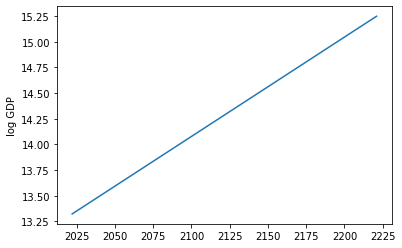

In [154]:
gdp_ = np.array([gdp(initial_gdp=initial_gdp,
                     gdp_growth=gdp_growth_p[GRAPH_P],
                     year=(y - CURRENT_YEAR)) for y in years])
plt.plot(years, np.log10(gdp_))
plt.ylabel('log GDP')

In [155]:
for y in years:
    print('Year: {} - GDP log$ {} (~{})'.format(y,
                                                np.round(np.log10(gdp_[y - CURRENT_YEAR]), 1),
                                                numerize(np.log10(gdp_[y - CURRENT_YEAR]))))
    

Year: 2022 - GDP log$ 13.3 (~10 trillion)
Year: 2023 - GDP log$ 13.3 (~10 trillion)
Year: 2024 - GDP log$ 13.3 (~10 trillion)
Year: 2025 - GDP log$ 13.4 (~10 trillion)
Year: 2026 - GDP log$ 13.4 (~10 trillion)
Year: 2027 - GDP log$ 13.4 (~10 trillion)
Year: 2028 - GDP log$ 13.4 (~10 trillion)
Year: 2029 - GDP log$ 13.4 (~10 trillion)
Year: 2030 - GDP log$ 13.4 (~10 trillion)
Year: 2031 - GDP log$ 13.4 (~10 trillion)
Year: 2032 - GDP log$ 13.4 (~10 trillion)
Year: 2033 - GDP log$ 13.4 (~10 trillion)
Year: 2034 - GDP log$ 13.4 (~10 trillion)
Year: 2035 - GDP log$ 13.4 (~10 trillion)
Year: 2036 - GDP log$ 13.5 (~10 trillion)
Year: 2037 - GDP log$ 13.5 (~10 trillion)
Year: 2038 - GDP log$ 13.5 (~10 trillion)
Year: 2039 - GDP log$ 13.5 (~10 trillion)
Year: 2040 - GDP log$ 13.5 (~10 trillion)
Year: 2041 - GDP log$ 13.5 (~10 trillion)
Year: 2042 - GDP log$ 13.5 (~10 trillion)
Year: 2043 - GDP log$ 13.5 (~10 trillion)
Year: 2044 - GDP log$ 13.5 (~10 trillion)
Year: 2045 - GDP log$ 13.5 (~10 tr

## Willingness to Pay Over Time

Text(0, 0.5, 'log $ willing to spend on TAI')

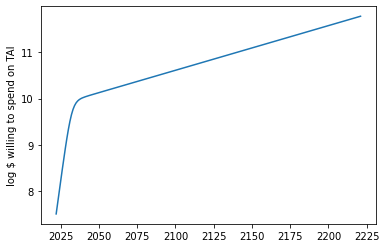

In [156]:
willingness = np.array([willingness_to_pay(initial_gdp=initial_gdp,
                                           gdp_growth=gdp_growth_p[GRAPH_P],
                                           initial_pay=10 ** initial_pay_p[GRAPH_P],
                                           spend_doubling_time=spend_doubling_time_p[GRAPH_P],
                                           max_gdp_frac=max_gdp_frac_p[GRAPH_P],
                                           year=(y - CURRENT_YEAR)) for y in years])

plt.plot(years, np.log10(willingness))
plt.ylabel('log $ willing to spend on TAI')


In [157]:
for y in years:
    print('Year: {} - willingness log$ {} (~{})'.format(y,
                                                        np.round(np.log10(willingness[y - CURRENT_YEAR]), 1),
                                                        numerize(np.log10(willingness[y - CURRENT_YEAR]))))

Year: 2022 - willingness log$ 7.5 (~10 million)
Year: 2023 - willingness log$ 7.7 (~10 million)
Year: 2024 - willingness log$ 8.0 (~10 million)
Year: 2025 - willingness log$ 8.2 (~100 million)
Year: 2026 - willingness log$ 8.5 (~100 million)
Year: 2027 - willingness log$ 8.7 (~100 million)
Year: 2028 - willingness log$ 8.9 (~100 million)
Year: 2029 - willingness log$ 9.1 (~one billion)
Year: 2030 - willingness log$ 9.3 (~one billion)
Year: 2031 - willingness log$ 9.5 (~one billion)
Year: 2032 - willingness log$ 9.7 (~one billion)
Year: 2033 - willingness log$ 9.8 (~one billion)
Year: 2034 - willingness log$ 9.8 (~one billion)
Year: 2035 - willingness log$ 9.9 (~one billion)
Year: 2036 - willingness log$ 9.9 (~one billion)
Year: 2037 - willingness log$ 10.0 (~one billion)
Year: 2038 - willingness log$ 10.0 (~one billion)
Year: 2039 - willingness log$ 10.0 (~10 billion)
Year: 2040 - willingness log$ 10.0 (~10 billion)
Year: 2041 - willingness log$ 10.0 (~10 billion)
Year: 2042 - willingn

## FLOPs Needed to Make TAI (Given Algorithmic Progress)

Text(0, 0.5, 'log FLOPs needed to make TAI')

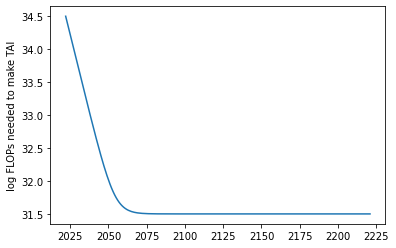

In [158]:
flops_ = np.array([flops_needed(initial_flops=10 ** initial_flops_p[GRAPH_P],
                                doubling_rate=algo_doubling_rate_p[GRAPH_P],
                                possible_reduction=10 ** possible_algo_reduction_fn(min_reduction_p[GRAPH_P], max_reduction_p[GRAPH_P], initial_flops_p[GRAPH_P]),
                                year=(y - CURRENT_YEAR)) for y in years])

plt.plot(years, np.log10(flops_))
plt.ylabel('log FLOPs needed to make TAI')


In [159]:
for y in years:
    print('Year: {} - log FLOPs needed for TAI {} (~{})'.format(y,
                                                                np.round(np.log10(flops_[y - CURRENT_YEAR]), 1),
                                                                numerize(np.log10(flops_[y - CURRENT_YEAR]))))

Year: 2022 - log FLOPs needed for TAI 34.5 (~10 decillion)
Year: 2023 - log FLOPs needed for TAI 34.4 (~10 decillion)
Year: 2024 - log FLOPs needed for TAI 34.3 (~10 decillion)
Year: 2025 - log FLOPs needed for TAI 34.2 (~10 decillion)
Year: 2026 - log FLOPs needed for TAI 34.1 (~10 decillion)
Year: 2027 - log FLOPs needed for TAI 34.0 (~10 decillion)
Year: 2028 - log FLOPs needed for TAI 33.9 (~one decillion)
Year: 2029 - log FLOPs needed for TAI 33.8 (~one decillion)
Year: 2030 - log FLOPs needed for TAI 33.7 (~one decillion)
Year: 2031 - log FLOPs needed for TAI 33.7 (~one decillion)
Year: 2032 - log FLOPs needed for TAI 33.6 (~one decillion)
Year: 2033 - log FLOPs needed for TAI 33.5 (~one decillion)
Year: 2034 - log FLOPs needed for TAI 33.4 (~one decillion)
Year: 2035 - log FLOPs needed for TAI 33.3 (~one decillion)
Year: 2036 - log FLOPs needed for TAI 33.2 (~one decillion)
Year: 2037 - log FLOPs needed for TAI 33.1 (~one decillion)
Year: 2038 - log FLOPs needed for TAI 33.0 (~o

## FLOPs per Dollar (Given Declining Costs)

Text(0, 0.5, 'log FLOPs per $1')

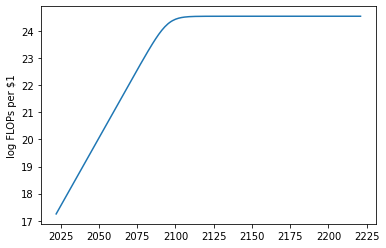

In [160]:
flops_per_dollar_ = np.array([flops_per_dollar(initial_flops_per_dollar=10 ** initial_flops_per_dollar_p[GRAPH_P],
                                               max_flops_per_dollar=10 ** max_flops_per_dollar_p[GRAPH_P],
                                               halving_rate=flops_halving_rate_p[GRAPH_P],
                                               year=(y - CURRENT_YEAR)) for y in years])
plt.plot(years, np.log10(flops_per_dollar_))
plt.ylabel('log FLOPs per $1')


In [161]:
for y in years:
    print('Year: {} - log {} FLOPs per $ (~{})'.format(y,
                                                       np.round(np.log10(flops_per_dollar_[y - CURRENT_YEAR]), 1),
                                                       numerize(np.log10(flops_per_dollar_[y - CURRENT_YEAR]))))

Year: 2022 - log 17.3 FLOPs per $ (~100 quadrillion)
Year: 2023 - log 17.4 FLOPs per $ (~100 quadrillion)
Year: 2024 - log 17.5 FLOPs per $ (~100 quadrillion)
Year: 2025 - log 17.6 FLOPs per $ (~100 quadrillion)
Year: 2026 - log 17.7 FLOPs per $ (~100 quadrillion)
Year: 2027 - log 17.8 FLOPs per $ (~100 quadrillion)
Year: 2028 - log 17.9 FLOPs per $ (~100 quadrillion)
Year: 2029 - log 18.0 FLOPs per $ (~100 quadrillion)
Year: 2030 - log 18.1 FLOPs per $ (~one quintillion)
Year: 2031 - log 18.2 FLOPs per $ (~one quintillion)
Year: 2032 - log 18.3 FLOPs per $ (~one quintillion)
Year: 2033 - log 18.4 FLOPs per $ (~one quintillion)
Year: 2034 - log 18.5 FLOPs per $ (~one quintillion)
Year: 2035 - log 18.6 FLOPs per $ (~one quintillion)
Year: 2036 - log 18.7 FLOPs per $ (~one quintillion)
Year: 2037 - log 18.8 FLOPs per $ (~one quintillion)
Year: 2038 - log 18.9 FLOPs per $ (~one quintillion)
Year: 2039 - log 19.0 FLOPs per $ (~one quintillion)
Year: 2040 - log 19.1 FLOPs per $ (~10 quintil

## Max Possible OOM Reduction in TAI FLOP Size

Text(0.5, 0, 'initial FLOP needed for TAI prior to any reduction')

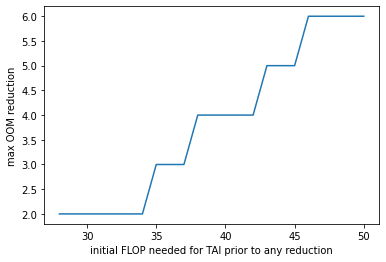

In [162]:
tai_sizes = range(28, 51)
flops_per_dollar_ = np.array([possible_algo_reduction_fn(min_reduction_p[GRAPH_P], max_reduction_p[GRAPH_P], t) for t in tai_sizes])
plt.plot(tai_sizes, flops_per_dollar_)
plt.ylabel('max OOM reduction')
plt.xlabel('initial FLOP needed for TAI prior to any reduction')

In [163]:
for t in tai_sizes:
    print('TAI log FLOP {} -> {} OOM reductions possible'.format(t,
                                                                 round(possible_algo_reduction_fn(min_reduction_p[GRAPH_P],
                                                                                                  max_reduction_p[GRAPH_P],
                                                                                                  t), 2)))
          

TAI log FLOP 28 -> 2.0 OOM reductions possible
TAI log FLOP 29 -> 2.0 OOM reductions possible
TAI log FLOP 30 -> 2.0 OOM reductions possible
TAI log FLOP 31 -> 2.0 OOM reductions possible
TAI log FLOP 32 -> 2.0 OOM reductions possible
TAI log FLOP 33 -> 2.0 OOM reductions possible
TAI log FLOP 34 -> 2.0 OOM reductions possible
TAI log FLOP 35 -> 3.0 OOM reductions possible
TAI log FLOP 36 -> 3.0 OOM reductions possible
TAI log FLOP 37 -> 3.0 OOM reductions possible
TAI log FLOP 38 -> 4.0 OOM reductions possible
TAI log FLOP 39 -> 4.0 OOM reductions possible
TAI log FLOP 40 -> 4.0 OOM reductions possible
TAI log FLOP 41 -> 4.0 OOM reductions possible
TAI log FLOP 42 -> 4.0 OOM reductions possible
TAI log FLOP 43 -> 5.0 OOM reductions possible
TAI log FLOP 44 -> 5.0 OOM reductions possible
TAI log FLOP 45 -> 5.0 OOM reductions possible
TAI log FLOP 46 -> 6.0 OOM reductions possible
TAI log FLOP 47 -> 6.0 OOM reductions possible
TAI log FLOP 48 -> 6.0 OOM reductions possible
TAI log FLOP 

## Dollars Needed to Buy TAI (Given Algorithmic Progress and Decline in Cost per FLOP)

Text(0, 0.5, 'log $ needed to buy TAI')

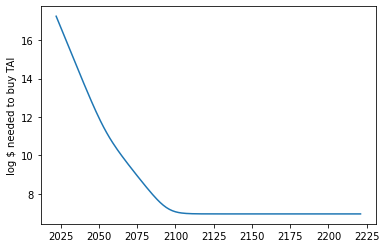

In [164]:
cost_of_tai_ = np.array([cost_of_tai(initial_flops=10 ** initial_flops_p[GRAPH_P],
                                     possible_reduction=10 ** possible_algo_reduction_fn(min_reduction_p[GRAPH_P], max_reduction_p[GRAPH_P], initial_flops_p[GRAPH_P]),
                                     algo_doubling_rate=algo_doubling_rate_p[GRAPH_P],
                                     initial_flops_per_dollar=10 ** initial_flops_per_dollar_p[GRAPH_P],
                                     max_flops_per_dollar=10 ** max_flops_per_dollar_p[GRAPH_P],
                                     flops_halving_rate=flops_halving_rate_p[GRAPH_P],
                                     year=(y - CURRENT_YEAR)) for y in years])

plt.plot(years, np.log10(cost_of_tai_))
plt.ylabel('log $ needed to buy TAI')


In [165]:
for y in years:
    print('Year: {} - log $ {} to buy TAI (~{})'.format(y,
                                                        np.round(np.log10(cost_of_tai_[y - CURRENT_YEAR]), 1),
                                                        numerize(np.log10(cost_of_tai_[y - CURRENT_YEAR]))))

Year: 2022 - log $ 17.2 to buy TAI (~100 quadrillion)
Year: 2023 - log $ 17.1 to buy TAI (~100 quadrillion)
Year: 2024 - log $ 16.9 to buy TAI (~10 quadrillion)
Year: 2025 - log $ 16.7 to buy TAI (~10 quadrillion)
Year: 2026 - log $ 16.5 to buy TAI (~10 quadrillion)
Year: 2027 - log $ 16.3 to buy TAI (~10 quadrillion)
Year: 2028 - log $ 16.1 to buy TAI (~10 quadrillion)
Year: 2029 - log $ 15.9 to buy TAI (~one quadrillion)
Year: 2030 - log $ 15.7 to buy TAI (~one quadrillion)
Year: 2031 - log $ 15.5 to buy TAI (~one quadrillion)
Year: 2032 - log $ 15.3 to buy TAI (~one quadrillion)
Year: 2033 - log $ 15.1 to buy TAI (~one quadrillion)
Year: 2034 - log $ 14.9 to buy TAI (~100 trillion)
Year: 2035 - log $ 14.7 to buy TAI (~100 trillion)
Year: 2036 - log $ 14.5 to buy TAI (~100 trillion)
Year: 2037 - log $ 14.3 to buy TAI (~100 trillion)
Year: 2038 - log $ 14.1 to buy TAI (~100 trillion)
Year: 2039 - log $ 14.0 to buy TAI (~10 trillion)
Year: 2040 - log $ 13.8 to buy TAI (~10 trillion)
Ye

## FLOPs at Max Spend

Text(0, 0.5, 'max log FLOPs bought given willingness to spend')

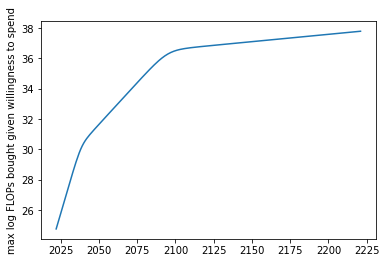

In [166]:
flops_at_max_ = np.array([flops_at_max(initial_gdp=initial_gdp,
                                       gdp_growth=gdp_growth_p[GRAPH_P],
                                       initial_pay=10 ** initial_pay_p[GRAPH_P],
                                       spend_doubling_time=spend_doubling_time_p[GRAPH_P],
                                       max_gdp_frac=max_gdp_frac_p[GRAPH_P],
                                       initial_flops_per_dollar=10 ** initial_flops_per_dollar_p[GRAPH_P],
                                       max_flops_per_dollar=10 ** max_flops_per_dollar_p[GRAPH_P],
                                       flops_halving_rate=flops_halving_rate_p[GRAPH_P],
                                       year=(y - CURRENT_YEAR)) for y in years])

plt.plot(years, np.log10(flops_at_max_))
plt.ylabel('max log FLOPs bought given willingness to spend')


In [167]:
for y in years:
    print('Year: {} - max log FLOPs {} (~{})'.format(y,
                                                     np.round(np.log10(flops_at_max_[y - CURRENT_YEAR]), 1),
                                                     numerize(np.log10(flops_at_max_[y - CURRENT_YEAR]))))

Year: 2022 - max log FLOPs 24.8 (~one septillion)
Year: 2023 - max log FLOPs 25.1 (~10 septillion)
Year: 2024 - max log FLOPs 25.4 (~10 septillion)
Year: 2025 - max log FLOPs 25.8 (~10 septillion)
Year: 2026 - max log FLOPs 26.1 (~100 septillion)
Year: 2027 - max log FLOPs 26.5 (~100 septillion)
Year: 2028 - max log FLOPs 26.8 (~100 septillion)
Year: 2029 - max log FLOPs 27.2 (~one octillion)
Year: 2030 - max log FLOPs 27.5 (~one octillion)
Year: 2031 - max log FLOPs 27.9 (~one octillion)
Year: 2032 - max log FLOPs 28.2 (~10 octillion)
Year: 2033 - max log FLOPs 28.5 (~10 octillion)
Year: 2034 - max log FLOPs 28.9 (~10 octillion)
Year: 2035 - max log FLOPs 29.2 (~100 octillion)
Year: 2036 - max log FLOPs 29.5 (~100 octillion)
Year: 2037 - max log FLOPs 29.8 (~100 octillion)
Year: 2038 - max log FLOPs 30.0 (~one nonillion)
Year: 2039 - max log FLOPs 30.2 (~one nonillion)
Year: 2040 - max log FLOPs 30.4 (~one nonillion)
Year: 2041 - max log FLOPs 30.6 (~one nonillion)
Year: 2042 - max lo

## Chance of Non-scaling Delay

Text(0, 0.5, 'chance of non-scaling delay by year')

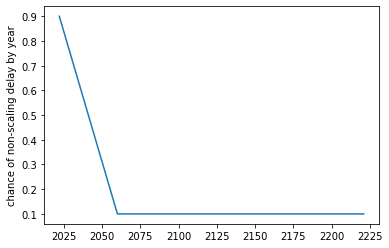

In [168]:
p_nonscaling_delay_ = np.array([p_nonscaling_delay(initial_chance_of_nonscaling_issue,
                                                   final_chance_of_nonscaling_issue,
                                                   year=y,
                                                   max_year=nonscaling_issue_bottom_year) for y in years])

plt.plot(years, p_nonscaling_delay_)
plt.ylabel('chance of non-scaling delay by year')
# TODO: Make logistic?

In [169]:
for y in years:
    print('Year: {} - p(nonscaling delay) = {}%'.format(y,
                                                        np.round(p_nonscaling_delay_[y - CURRENT_YEAR] * 100, 1)))

Year: 2022 - p(nonscaling delay) = 90.0%
Year: 2023 - p(nonscaling delay) = 87.9%
Year: 2024 - p(nonscaling delay) = 85.8%
Year: 2025 - p(nonscaling delay) = 83.7%
Year: 2026 - p(nonscaling delay) = 81.6%
Year: 2027 - p(nonscaling delay) = 79.5%
Year: 2028 - p(nonscaling delay) = 77.4%
Year: 2029 - p(nonscaling delay) = 75.3%
Year: 2030 - p(nonscaling delay) = 73.2%
Year: 2031 - p(nonscaling delay) = 71.1%
Year: 2032 - p(nonscaling delay) = 68.9%
Year: 2033 - p(nonscaling delay) = 66.8%
Year: 2034 - p(nonscaling delay) = 64.7%
Year: 2035 - p(nonscaling delay) = 62.6%
Year: 2036 - p(nonscaling delay) = 60.5%
Year: 2037 - p(nonscaling delay) = 58.4%
Year: 2038 - p(nonscaling delay) = 56.3%
Year: 2039 - p(nonscaling delay) = 54.2%
Year: 2040 - p(nonscaling delay) = 52.1%
Year: 2041 - p(nonscaling delay) = 50.0%
Year: 2042 - p(nonscaling delay) = 47.9%
Year: 2043 - p(nonscaling delay) = 45.8%
Year: 2044 - p(nonscaling delay) = 43.7%
Year: 2045 - p(nonscaling delay) = 41.6%
Year: 2046 - p(n

## Chance of Rapid Recursive Self-Improvement

Text(0.5, 0, 'percentage of TAI-level FLOP')

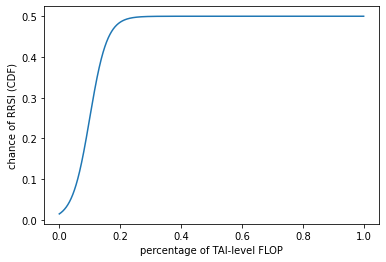

In [170]:
p_rrsi_ = np.array([p_rapid_recursive_self_improvement(10000,
                                                       x,
                                                       base_p_recursive,
                                                       recursive_curve_steepness,
                                                       recursive_curve_inflection) for x in range(10000)])

plt.plot([r / 10000 for r in range(10000)], p_rrsi_)
plt.ylabel('chance of RRSI (CDF)')
plt.xlabel('percentage of TAI-level FLOP')

In [171]:
samples = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200,
           1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
for i in samples:
    print('Ratio: {} in 10000 - p(RRSI) (CDF) = {}%'.format(i, np.round(p_rrsi_[i-1] * 100, 1)))

Ratio: 1 in 10000 - p(RRSI) (CDF) = 1.5%
Ratio: 5 in 10000 - p(RRSI) (CDF) = 1.5%
Ratio: 10 in 10000 - p(RRSI) (CDF) = 1.5%
Ratio: 20 in 10000 - p(RRSI) (CDF) = 1.6%
Ratio: 30 in 10000 - p(RRSI) (CDF) = 1.6%
Ratio: 40 in 10000 - p(RRSI) (CDF) = 1.7%
Ratio: 50 in 10000 - p(RRSI) (CDF) = 1.7%
Ratio: 60 in 10000 - p(RRSI) (CDF) = 1.8%
Ratio: 70 in 10000 - p(RRSI) (CDF) = 1.9%
Ratio: 80 in 10000 - p(RRSI) (CDF) = 1.9%
Ratio: 90 in 10000 - p(RRSI) (CDF) = 2.0%
Ratio: 100 in 10000 - p(RRSI) (CDF) = 2.0%
Ratio: 200 in 10000 - p(RRSI) (CDF) = 2.9%
Ratio: 300 in 10000 - p(RRSI) (CDF) = 4.0%
Ratio: 400 in 10000 - p(RRSI) (CDF) = 5.4%
Ratio: 500 in 10000 - p(RRSI) (CDF) = 7.4%
Ratio: 600 in 10000 - p(RRSI) (CDF) = 9.9%
Ratio: 700 in 10000 - p(RRSI) (CDF) = 12.9%
Ratio: 800 in 10000 - p(RRSI) (CDF) = 16.6%
Ratio: 900 in 10000 - p(RRSI) (CDF) = 20.6%
Ratio: 1000 in 10000 - p(RRSI) (CDF) = 25.0%
Ratio: 1100 in 10000 - p(RRSI) (CDF) = 29.3%
Ratio: 1200 in 10000 - p(RRSI) (CDF) = 33.4%
Ratio: 1300 in 

## Run Model

Running
## RUN 1/10000 ##
Diagnostic: tai_flop_size=41.80846736988931, nonscaling_delay=3.0683354024477656, algo_doubling_rate=4.000001221233676, possible_algo_reduction=5.361998832716835, initial_flops_per_dollar=2.3051670514902954e+17, flops_halving_rate=2.541012261207891, max_flops_per_dollar=6.254617895747252e+24, initial_pay=17394867.03100884, gdp_growth=1.02479734920161, max_gdp_frac=7.522170151676544e-05, willingness_ramp=0.8216079000671045, spend_doubling_time=1.0858956141806408
-
It takes 41.8 log FLOPs (~100 million decillion) for transformative capabilities.
Every 4.0 years algorithms get 2x better, with 5.4 log reductions possible.
FLOPs start at a cost of 17.4 log FLOPs (~100 quadrillion) per $. Every 2.5 years they get 2x cheaper, to a maximum of 24.8 log FLOPs (~one septillion) per $.
We are willing to pay 7.2 log $ (~10 million) and this increases by 1.1x per year to a max of 0.0001% of GDP. GDP grows at a rate of 1.025x per year.
If we are 82.0% of the way to paying fo

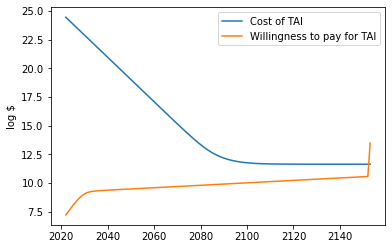

## RUN 2/10000 ##
Diagnostic: tai_flop_size=35.86065789411234, nonscaling_delay=8.847286039107415, algo_doubling_rate=2.3753918273157684, possible_algo_reduction=3.36021550660343, initial_flops_per_dollar=2.7056087088260182e+17, flops_halving_rate=3.2911798243504005, max_flops_per_dollar=3.418245270974932e+24, initial_pay=58835923.58691952, gdp_growth=1.0284393308343807, max_gdp_frac=0.00031299555032808073, willingness_ramp=0.8477112962354219, spend_doubling_time=0.741854435192341
-
It takes 35.9 log FLOPs (~100 decillion) for transformative capabilities.
Every 2.4 years algorithms get 2x better, with 3.4 log reductions possible.
FLOPs start at a cost of 17.4 log FLOPs (~100 quadrillion) per $. Every 3.3 years they get 2x cheaper, to a maximum of 24.5 log FLOPs (~one septillion) per $.
We are willing to pay 7.8 log $ (~10 million) and this increases by 0.7x per year to a max of 0.0003% of GDP. GDP grows at a rate of 1.028x per year.
If we are 85.0% of the way to paying for TAI, we will

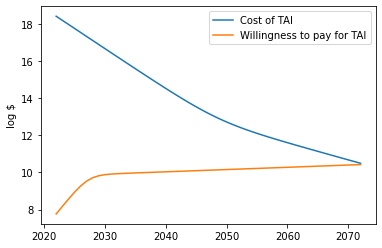

## RUN 3/10000 ##
Diagnostic: tai_flop_size=44.095078953688876, nonscaling_delay=5.332858917656669, algo_doubling_rate=3.9364543024502145, possible_algo_reduction=4.870204745505956, initial_flops_per_dollar=2.1488085721499574e+17, flops_halving_rate=3.172934966916518, max_flops_per_dollar=1.0082016632069272e+22, initial_pay=14476668.01508611, gdp_growth=1.0243948095821995, max_gdp_frac=0.0011678835701182174, willingness_ramp=0.8790995969239099, spend_doubling_time=1.1358361296166612
-
It takes 44.1 log FLOPs (~100 billion decillion) for transformative capabilities.
Every 3.9 years algorithms get 2x better, with 4.9 log reductions possible.
FLOPs start at a cost of 17.3 log FLOPs (~100 quadrillion) per $. Every 3.2 years they get 2x cheaper, to a maximum of 22.0 log FLOPs (~10 sextillion) per $.
We are willing to pay 7.2 log $ (~10 million) and this increases by 1.1x per year to a max of 0.0012% of GDP. GDP grows at a rate of 1.024x per year.
If we are 88.0% of the way to paying for TAI

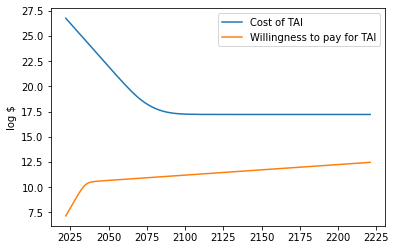

## RUN 4/10000 ##
Diagnostic: tai_flop_size=39.54121821716758, nonscaling_delay=5.9369156369647405, algo_doubling_rate=1.602692884446618, possible_algo_reduction=4.165143192182001, initial_flops_per_dollar=1.7250964241906733e+17, flops_halving_rate=2.953047655830814, max_flops_per_dollar=3.642143233880718e+26, initial_pay=129596840.42280675, gdp_growth=1.0214782859371436, max_gdp_frac=0.0002172940661794623, willingness_ramp=1.067978792579734, spend_doubling_time=1.9764842530735052
-
It takes 39.5 log FLOPs (~one million decillion) for transformative capabilities.
Every 1.6 years algorithms get 2x better, with 4.2 log reductions possible.
FLOPs start at a cost of 17.2 log FLOPs (~100 quadrillion) per $. Every 3.0 years they get 2x cheaper, to a maximum of 26.6 log FLOPs (~100 septillion) per $.
We are willing to pay 8.1 log $ (~100 million) and this increases by 2.0x per year to a max of 0.0002% of GDP. GDP grows at a rate of 1.021x per year.
If we are 107.0% of the way to paying for TA

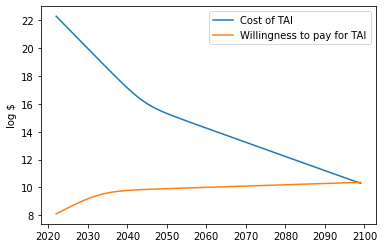

## RUN 5/10000 ##
Diagnostic: tai_flop_size=39.339728916804475, nonscaling_delay=10.072701354640737, algo_doubling_rate=3.0861127709149256, possible_algo_reduction=4.230489936212955, initial_flops_per_dollar=1.3864971217714432e+17, flops_halving_rate=3.0990416021376914, max_flops_per_dollar=5.3981872056275715e+22, initial_pay=39490115.4902735, gdp_growth=1.0257682857819461, max_gdp_frac=0.0010208236299808964, willingness_ramp=0.862874486612838, spend_doubling_time=1.3075839632926918
-
It takes 39.3 log FLOPs (~one million decillion) for transformative capabilities.
Every 3.1 years algorithms get 2x better, with 4.2 log reductions possible.
FLOPs start at a cost of 17.1 log FLOPs (~100 quadrillion) per $. Every 3.1 years they get 2x cheaper, to a maximum of 22.7 log FLOPs (~10 sextillion) per $.
We are willing to pay 7.6 log $ (~10 million) and this increases by 1.3x per year to a max of 0.001% of GDP. GDP grows at a rate of 1.026x per year.
If we are 86.0% of the way to paying for TAI,

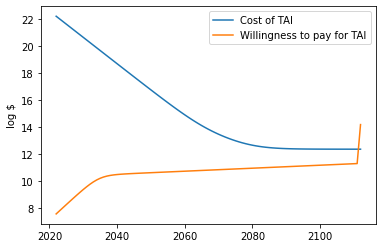

## RUN 6/10000 ##
Diagnostic: tai_flop_size=37.79403510020433, nonscaling_delay=0.669284819093656, algo_doubling_rate=1.5, possible_algo_reduction=3.64197589545054, initial_flops_per_dollar=1.6762573933767613e+17, flops_halving_rate=3.0233959484268236, max_flops_per_dollar=3.4584110311316834e+26, initial_pay=24507578.573858257, gdp_growth=1.025704687528837, max_gdp_frac=0.00041458526411674543, willingness_ramp=0.9363754052923313, spend_doubling_time=0.5770133139062079
-
It takes 37.8 log FLOPs (~10 thousand decillion) for transformative capabilities.
Every 1.5 years algorithms get 2x better, with 3.6 log reductions possible.
FLOPs start at a cost of 17.2 log FLOPs (~100 quadrillion) per $. Every 3.0 years they get 2x cheaper, to a maximum of 26.5 log FLOPs (~100 septillion) per $.
We are willing to pay 7.4 log $ (~10 million) and this increases by 0.6x per year to a max of 0.0004% of GDP. GDP grows at a rate of 1.026x per year.
If we are 94.0% of the way to paying for TAI, we will ramp

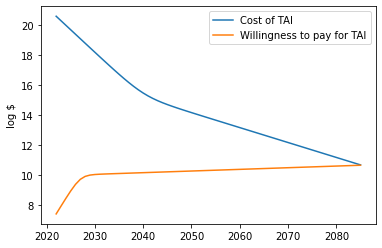

## RUN 7/10000 ##
Diagnostic: tai_flop_size=43.41338101699302, nonscaling_delay=23.17485396170868, algo_doubling_rate=2.3334962172394205, possible_algo_reduction=4.719127045893095, initial_flops_per_dollar=2.053379866935232e+17, flops_halving_rate=3.4534128825152663, max_flops_per_dollar=2.9735125017483353e+26, initial_pay=24661377.85011491, gdp_growth=1.0200122542764984, max_gdp_frac=0.0001481657438676141, willingness_ramp=0.9281305063073062, spend_doubling_time=0.5014295149647586
-
It takes 43.4 log FLOPs (~10 billion decillion) for transformative capabilities.
Every 2.3 years algorithms get 2x better, with 4.7 log reductions possible.
FLOPs start at a cost of 17.3 log FLOPs (~100 quadrillion) per $. Every 3.5 years they get 2x cheaper, to a maximum of 26.5 log FLOPs (~100 septillion) per $.
We are willing to pay 7.4 log $ (~10 million) and this increases by 0.5x per year to a max of 0.0001% of GDP. GDP grows at a rate of 1.02x per year.
If we are 93.0% of the way to paying for TAI, 

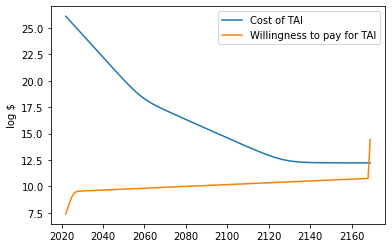

## RUN 8/10000 ##
Diagnostic: tai_flop_size=38.161713222829405, nonscaling_delay=15.077698303918403, algo_doubling_rate=2.609974207961415, possible_algo_reduction=4.410605576608187, initial_flops_per_dollar=1.7801721829856314e+17, flops_halving_rate=3.2305062863351046, max_flops_per_dollar=9.717177242925762e+23, initial_pay=87060281.87296622, gdp_growth=1.029488819280782, max_gdp_frac=0.0004190558847345013, willingness_ramp=0.8304984135953234, spend_doubling_time=0.9100217756122855
-
It takes 38.2 log FLOPs (~100 thousand decillion) for transformative capabilities.
Every 2.6 years algorithms get 2x better, with 4.4 log reductions possible.
FLOPs start at a cost of 17.3 log FLOPs (~100 quadrillion) per $. Every 3.2 years they get 2x cheaper, to a maximum of 24.0 log FLOPs (~100 sextillion) per $.
We are willing to pay 7.9 log $ (~10 million) and this increases by 0.9x per year to a max of 0.0004% of GDP. GDP grows at a rate of 1.029x per year.
If we are 83.0% of the way to paying for TA

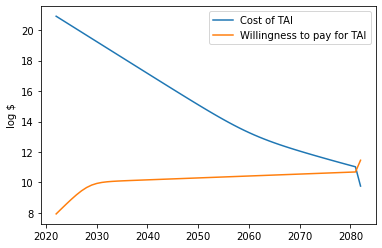

## RUN 9/10000 ##
Diagnostic: tai_flop_size=39.42704686856417, nonscaling_delay=5.246286029115069, algo_doubling_rate=2.9571071599566547, possible_algo_reduction=3.4506915852940394, initial_flops_per_dollar=1.2675237652179877e+17, flops_halving_rate=3.0338652853907333, max_flops_per_dollar=4.910279708970155e+24, initial_pay=15849892.370080115, gdp_growth=1.0210174693412097, max_gdp_frac=0.0009083555813413129, willingness_ramp=0.7692042056366492, spend_doubling_time=1.7182245202983661
-
It takes 39.4 log FLOPs (~one million decillion) for transformative capabilities.
Every 3.0 years algorithms get 2x better, with 3.5 log reductions possible.
FLOPs start at a cost of 17.1 log FLOPs (~100 quadrillion) per $. Every 3.0 years they get 2x cheaper, to a maximum of 24.7 log FLOPs (~one septillion) per $.
We are willing to pay 7.2 log $ (~10 million) and this increases by 1.7x per year to a max of 0.0009% of GDP. GDP grows at a rate of 1.021x per year.
If we are 77.0% of the way to paying for T

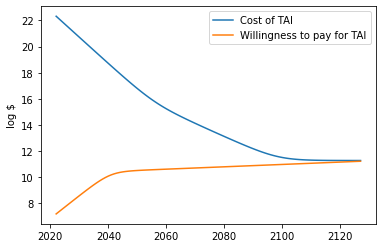

## RUN 10/10000 ##
Diagnostic: tai_flop_size=43.22319076470738, nonscaling_delay=23.45368243854588, algo_doubling_rate=3.789960230587895, possible_algo_reduction=5.013817201761358, initial_flops_per_dollar=1.893093860050113e+17, flops_halving_rate=3.092702882148125, max_flops_per_dollar=3.7503201585042627e+23, initial_pay=63641043.19320017, gdp_growth=1.0304364602685359, max_gdp_frac=0.00036190028193941665, willingness_ramp=0.9663720333290192, spend_doubling_time=0.6120102187700099
-
It takes 43.2 log FLOPs (~10 billion decillion) for transformative capabilities.
Every 3.8 years algorithms get 2x better, with 5.0 log reductions possible.
FLOPs start at a cost of 17.3 log FLOPs (~100 quadrillion) per $. Every 3.1 years they get 2x cheaper, to a maximum of 23.6 log FLOPs (~100 sextillion) per $.
We are willing to pay 7.8 log $ (~10 million) and this increases by 0.6x per year to a max of 0.0004% of GDP. GDP grows at a rate of 1.03x per year.
If we are 97.0% of the way to paying for TAI, 

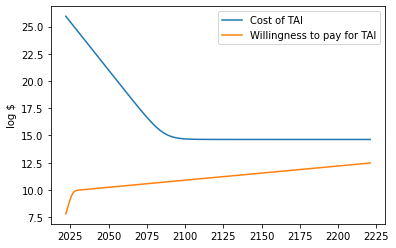

## RUN 11/10000 ##
Diagnostic: tai_flop_size=48.20723937669172, nonscaling_delay=10.922014335778151, algo_doubling_rate=3.574036553630338, possible_algo_reduction=5.393435235565672, initial_flops_per_dollar=1.811739362472329e+17, flops_halving_rate=3.1780702516516586, max_flops_per_dollar=2.6028218432723196e+23, initial_pay=14081961.196065512, gdp_growth=1.0186848982962697, max_gdp_frac=0.00034686994789087726, willingness_ramp=0.9617580163694834, spend_doubling_time=1.1088978333370805
-
It takes 48.2 log FLOPs (~one quadrillion decillion) for transformative capabilities.
Every 3.6 years algorithms get 2x better, with 5.4 log reductions possible.
FLOPs start at a cost of 17.3 log FLOPs (~100 quadrillion) per $. Every 3.2 years they get 2x cheaper, to a maximum of 23.4 log FLOPs (~100 sextillion) per $.
We are willing to pay 7.1 log $ (~10 million) and this increases by 1.1x per year to a max of 0.0003% of GDP. GDP grows at a rate of 1.019x per year.
If we are 96.0% of the way to paying 

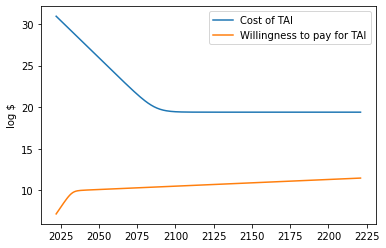

## RUN 12/10000 ##
Diagnostic: tai_flop_size=31.538592246472202, nonscaling_delay=5.188922704057728, algo_doubling_rate=3.660724533113611, possible_algo_reduction=1.5256268472589054, initial_flops_per_dollar=1.6371527050820467e+17, flops_halving_rate=3.1011391897214375, max_flops_per_dollar=6.481321302011422e+24, initial_pay=110994763.81213157, gdp_growth=1.0223449008995857, max_gdp_frac=0.0010217784691989246, willingness_ramp=0.8300015333197001, spend_doubling_time=1.4852027884640349
-
It takes 31.5 log FLOPs (~10 nonillion) for transformative capabilities.
Every 3.7 years algorithms get 2x better, with 1.5 log reductions possible.
FLOPs start at a cost of 17.2 log FLOPs (~100 quadrillion) per $. Every 3.1 years they get 2x cheaper, to a maximum of 24.8 log FLOPs (~one septillion) per $.
We are willing to pay 8.0 log $ (~100 million) and this increases by 1.5x per year to a max of 0.001% of GDP. GDP grows at a rate of 1.022x per year.
If we are 83.0% of the way to paying for TAI, we w

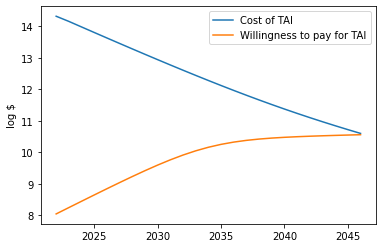

## RUN 13/10000 ##
Diagnostic: tai_flop_size=25.576834826133457, nonscaling_delay=2.357388353433749, algo_doubling_rate=4.05756248242079, possible_algo_reduction=1.957376517717585, initial_flops_per_dollar=3.102093859968364e+17, flops_halving_rate=3.3757497625616355, max_flops_per_dollar=1.0831585600016527e+27, initial_pay=34986791.33971285, gdp_growth=1.0256497344755846, max_gdp_frac=0.0004626737184176224, willingness_ramp=0.9669311098778556, spend_doubling_time=0.7072115620443526
-
It takes 25.6 log FLOPs (~10 septillion) for transformative capabilities.
Every 4.1 years algorithms get 2x better, with 2.0 log reductions possible.
FLOPs start at a cost of 17.5 log FLOPs (~100 quadrillion) per $. Every 3.4 years they get 2x cheaper, to a maximum of 27.0 log FLOPs (~one octillion) per $.
We are willing to pay 7.5 log $ (~10 million) and this increases by 0.7x per year to a max of 0.0005% of GDP. GDP grows at a rate of 1.026x per year.
If we are 97.0% of the way to paying for TAI, we will

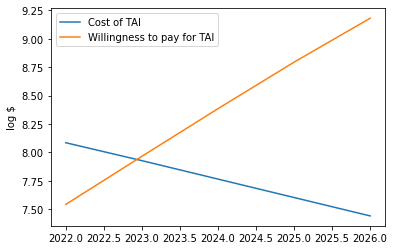

## RUN 14/10000 ##
Diagnostic: tai_flop_size=35.62874982709657, nonscaling_delay=3.176061436022732, algo_doubling_rate=3.1413070883792518, possible_algo_reduction=2.7350303270031695, initial_flops_per_dollar=2.8083792096834666e+17, flops_halving_rate=3.184829293354079, max_flops_per_dollar=8.198051170632054e+21, initial_pay=14549333.351025471, gdp_growth=1.0285139490371478, max_gdp_frac=0.00015162603564689548, willingness_ramp=0.85334896863757, spend_doubling_time=3.825614158810784
-
It takes 35.6 log FLOPs (~100 decillion) for transformative capabilities.
Every 3.1 years algorithms get 2x better, with 2.7 log reductions possible.
FLOPs start at a cost of 17.4 log FLOPs (~100 quadrillion) per $. Every 3.2 years they get 2x cheaper, to a maximum of 21.9 log FLOPs (~one sextillion) per $.
We are willing to pay 7.2 log $ (~10 million) and this increases by 3.8x per year to a max of 0.0002% of GDP. GDP grows at a rate of 1.029x per year.
If we are 85.0% of the way to paying for TAI, we wil

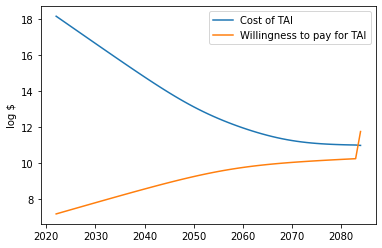

## RUN 15/10000 ##
Diagnostic: tai_flop_size=31.958011270708123, nonscaling_delay=1.751308253819344, algo_doubling_rate=3.4545126761606477, possible_algo_reduction=1.5305700836610763, initial_flops_per_dollar=1.9652201112290925e+17, flops_halving_rate=2.9609809156639826, max_flops_per_dollar=1.5398942344195323e+22, initial_pay=57309477.580249555, gdp_growth=1.0281150535118304, max_gdp_frac=0.000475374752706489, willingness_ramp=0.8016798946770248, spend_doubling_time=0.6729418617506293
-
It takes 32.0 log FLOPs (~10 nonillion) for transformative capabilities.
Every 3.5 years algorithms get 2x better, with 1.5 log reductions possible.
FLOPs start at a cost of 17.3 log FLOPs (~100 quadrillion) per $. Every 3.0 years they get 2x cheaper, to a maximum of 22.2 log FLOPs (~10 sextillion) per $.
We are willing to pay 7.8 log $ (~10 million) and this increases by 0.7x per year to a max of 0.0005% of GDP. GDP grows at a rate of 1.028x per year.
If we are 80.0% of the way to paying for TAI, we w

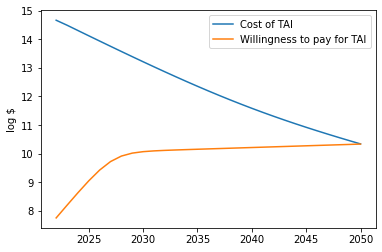

## RUN 16/10000 ##
Diagnostic: tai_flop_size=33.24408287653948, nonscaling_delay=0.9613020038957295, algo_doubling_rate=3.3964213029405266, possible_algo_reduction=3.293934686020893, initial_flops_per_dollar=9.55115523500086e+16, flops_halving_rate=1.879927098825237, max_flops_per_dollar=6.67296586551761e+22, initial_pay=11955337.836506357, gdp_growth=1.0248152579530743, max_gdp_frac=0.0004075629350893511, willingness_ramp=0.7967363046383542, spend_doubling_time=1.5847772759429033
-
It takes 33.2 log FLOPs (~one decillion) for transformative capabilities.
Every 3.4 years algorithms get 2x better, with 3.3 log reductions possible.
FLOPs start at a cost of 17.0 log FLOPs (~10 quadrillion) per $. Every 1.9 years they get 2x cheaper, to a maximum of 22.8 log FLOPs (~10 sextillion) per $.
We are willing to pay 7.1 log $ (~10 million) and this increases by 1.6x per year to a max of 0.0004% of GDP. GDP grows at a rate of 1.025x per year.
If we are 80.0% of the way to paying for TAI, we will r

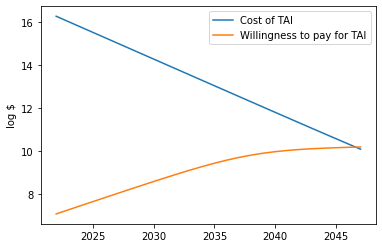

## RUN 17/10000 ##
Diagnostic: tai_flop_size=38.02472503243897, nonscaling_delay=6.61028607743329, algo_doubling_rate=1.5, possible_algo_reduction=3.83184123251499, initial_flops_per_dollar=1.9022197960856483e+17, flops_halving_rate=2.3778563028757453, max_flops_per_dollar=5.828906571405163e+24, initial_pay=48810893.28091055, gdp_growth=1.033135166987954, max_gdp_frac=6.620318420734837e-05, willingness_ramp=0.8367750817300369, spend_doubling_time=5.682639097731432
-
It takes 38.0 log FLOPs (~100 thousand decillion) for transformative capabilities.
Every 1.5 years algorithms get 2x better, with 3.8 log reductions possible.
FLOPs start at a cost of 17.3 log FLOPs (~100 quadrillion) per $. Every 2.4 years they get 2x cheaper, to a maximum of 24.8 log FLOPs (~one septillion) per $.
We are willing to pay 7.7 log $ (~10 million) and this increases by 5.7x per year to a max of 0.0001% of GDP. GDP grows at a rate of 1.033x per year.
If we are 84.0% of the way to paying for TAI, we will ramp to

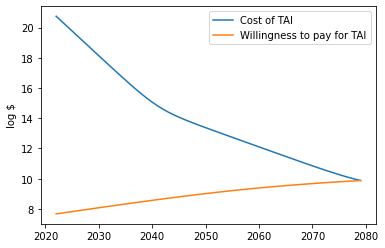

## RUN 18/10000 ##
Diagnostic: tai_flop_size=37.67960776326655, nonscaling_delay=5.207504548850452, algo_doubling_rate=1.7892465190637878, possible_algo_reduction=1.5316119646335478, initial_flops_per_dollar=1.8883521315309347e+17, flops_halving_rate=2.702499835152669, max_flops_per_dollar=1.3426067356423841e+26, initial_pay=176518769.86368087, gdp_growth=1.021722477638783, max_gdp_frac=0.0012169775732420634, willingness_ramp=0.7226714224317201, spend_doubling_time=0.9288016910291617
-
It takes 37.7 log FLOPs (~10 thousand decillion) for transformative capabilities.
Every 1.8 years algorithms get 2x better, with 1.5 log reductions possible.
FLOPs start at a cost of 17.3 log FLOPs (~100 quadrillion) per $. Every 2.7 years they get 2x cheaper, to a maximum of 26.1 log FLOPs (~100 septillion) per $.
We are willing to pay 8.2 log $ (~100 million) and this increases by 0.9x per year to a max of 0.0012% of GDP. GDP grows at a rate of 1.022x per year.
If we are 72.0% of the way to paying for 

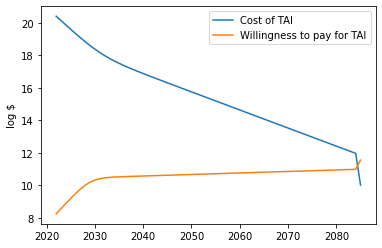

## RUN 19/10000 ##
Diagnostic: tai_flop_size=29.401612004420617, nonscaling_delay=9.200117714693803, algo_doubling_rate=2.1360422188477486, possible_algo_reduction=1.9050901798517204, initial_flops_per_dollar=1.6610551409683584e+17, flops_halving_rate=2.718040826253278, max_flops_per_dollar=6.243177239770673e+24, initial_pay=85209031.18280783, gdp_growth=1.0239727889895918, max_gdp_frac=0.00019808853628668695, willingness_ramp=0.9363983605542514, spend_doubling_time=1.5529507930957045
-
It takes 29.4 log FLOPs (~100 octillion) for transformative capabilities.
Every 2.1 years algorithms get 2x better, with 1.9 log reductions possible.
FLOPs start at a cost of 17.2 log FLOPs (~100 quadrillion) per $. Every 2.7 years they get 2x cheaper, to a maximum of 24.8 log FLOPs (~one septillion) per $.
We are willing to pay 7.9 log $ (~10 million) and this increases by 1.6x per year to a max of 0.0002% of GDP. GDP grows at a rate of 1.024x per year.
If we are 94.0% of the way to paying for TAI, we 

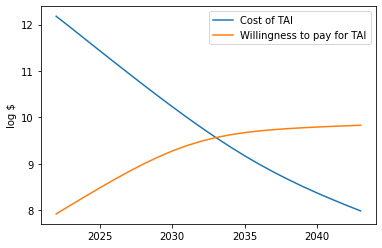

## RUN 20/10000 ##
Diagnostic: tai_flop_size=29.292606778432614, nonscaling_delay=2.4698044373340786, algo_doubling_rate=2.022609102024329, possible_algo_reduction=2.024306259179183, initial_flops_per_dollar=1.9270835900611184e+17, flops_halving_rate=2.945237031549384, max_flops_per_dollar=2.3269126099688788e+24, initial_pay=28227341.587612156, gdp_growth=1.0199169704522963, max_gdp_frac=0.00024937465751935083, willingness_ramp=0.9750687938661262, spend_doubling_time=1.1033336921077883
-
It takes 29.3 log FLOPs (~100 octillion) for transformative capabilities.
Every 2.0 years algorithms get 2x better, with 2.0 log reductions possible.
FLOPs start at a cost of 17.3 log FLOPs (~100 quadrillion) per $. Every 2.9 years they get 2x cheaper, to a maximum of 24.4 log FLOPs (~one septillion) per $.
We are willing to pay 7.5 log $ (~10 million) and this increases by 1.1x per year to a max of 0.0002% of GDP. GDP grows at a rate of 1.02x per year.
If we are 98.0% of the way to paying for TAI, we 

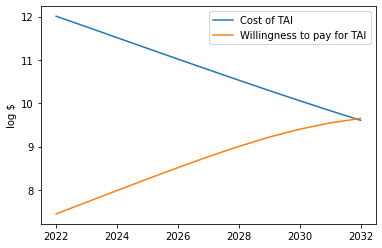

## RUN 21/10000 ##
Diagnostic: tai_flop_size=27.77492731843578, nonscaling_delay=7.613124175079807, algo_doubling_rate=4.905868976108843, possible_algo_reduction=1.6973368377329492, initial_flops_per_dollar=3.116316175249137e+17, flops_halving_rate=3.302351369330562, max_flops_per_dollar=1.3726793961146858e+24, initial_pay=75308303.08277248, gdp_growth=1.0212904452968548, max_gdp_frac=0.0008345036312325006, willingness_ramp=0.8436474807182098, spend_doubling_time=3.5651926511377567
-
It takes 27.8 log FLOPs (~one octillion) for transformative capabilities.
Every 4.9 years algorithms get 2x better, with 1.7 log reductions possible.
FLOPs start at a cost of 17.5 log FLOPs (~100 quadrillion) per $. Every 3.3 years they get 2x cheaper, to a maximum of 24.1 log FLOPs (~one septillion) per $.
We are willing to pay 7.9 log $ (~10 million) and this increases by 3.6x per year to a max of 0.0008% of GDP. GDP grows at a rate of 1.021x per year.
If we are 84.0% of the way to paying for TAI, we wil

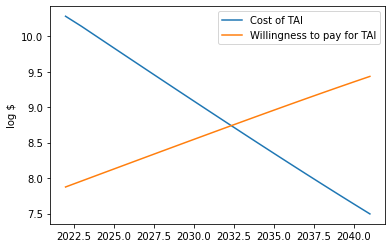

## RUN 22/10000 ##
Diagnostic: tai_flop_size=29.742000209116917, nonscaling_delay=3.398207448348221, algo_doubling_rate=5.19848634380119, possible_algo_reduction=2.228425176842219, initial_flops_per_dollar=3.263435067859364e+17, flops_halving_rate=3.4228142316672168, max_flops_per_dollar=1.3017721994161075e+25, initial_pay=141084363.25448912, gdp_growth=1.0237268894591203, max_gdp_frac=0.00024933249037612345, willingness_ramp=0.9588484266280576, spend_doubling_time=1.6553679330710547
-
It takes 29.7 log FLOPs (~100 octillion) for transformative capabilities.
Every 5.2 years algorithms get 2x better, with 2.2 log reductions possible.
FLOPs start at a cost of 17.5 log FLOPs (~100 quadrillion) per $. Every 3.4 years they get 2x cheaper, to a maximum of 25.1 log FLOPs (~10 septillion) per $.
We are willing to pay 8.1 log $ (~100 million) and this increases by 1.7x per year to a max of 0.0002% of GDP. GDP grows at a rate of 1.024x per year.
If we are 96.0% of the way to paying for TAI, we w

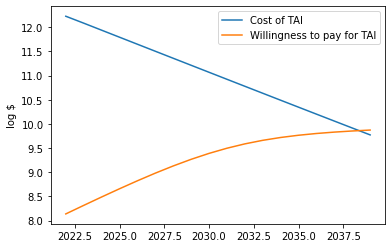

## RUN 23/10000 ##
Diagnostic: tai_flop_size=31.725192458294682, nonscaling_delay=2.0013711863470154, algo_doubling_rate=2.6174411576569723, possible_algo_reduction=1.546169340448779, initial_flops_per_dollar=1.3387893823366525e+17, flops_halving_rate=2.750891368240609, max_flops_per_dollar=4.988298203145087e+24, initial_pay=5091741.444362451, gdp_growth=1.015651532873481, max_gdp_frac=0.00012391168289230405, willingness_ramp=1.0989783148176084, spend_doubling_time=1.3825403601598238
-
It takes 31.7 log FLOPs (~10 nonillion) for transformative capabilities.
Every 2.6 years algorithms get 2x better, with 1.5 log reductions possible.
FLOPs start at a cost of 17.1 log FLOPs (~100 quadrillion) per $. Every 2.8 years they get 2x cheaper, to a maximum of 24.7 log FLOPs (~one septillion) per $.
We are willing to pay 6.7 log $ (~one million) and this increases by 1.4x per year to a max of 0.0001% of GDP. GDP grows at a rate of 1.016x per year.
If we are 110.0% of the way to paying for TAI, we 

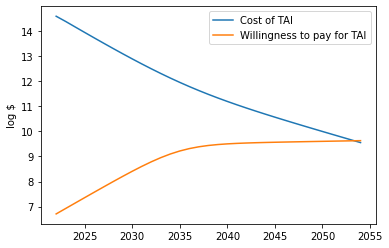

## RUN 24/10000 ##
Diagnostic: tai_flop_size=39.337206763038395, nonscaling_delay=1.0570100856441618, algo_doubling_rate=2.401833243868359, possible_algo_reduction=3.450229420058054, initial_flops_per_dollar=2.1468337677497523e+17, flops_halving_rate=4.49476358724379, max_flops_per_dollar=1.0285191955067568e+26, initial_pay=33790674.218470946, gdp_growth=1.0207080526278935, max_gdp_frac=0.0003481743537969686, willingness_ramp=0.795412391641046, spend_doubling_time=1.9368702750088032
-
It takes 39.3 log FLOPs (~one million decillion) for transformative capabilities.
Every 2.4 years algorithms get 2x better, with 3.5 log reductions possible.
FLOPs start at a cost of 17.3 log FLOPs (~100 quadrillion) per $. Every 4.5 years they get 2x cheaper, to a maximum of 26.0 log FLOPs (~100 septillion) per $.
We are willing to pay 7.5 log $ (~10 million) and this increases by 1.9x per year to a max of 0.0003% of GDP. GDP grows at a rate of 1.021x per year.
If we are 80.0% of the way to paying for TA

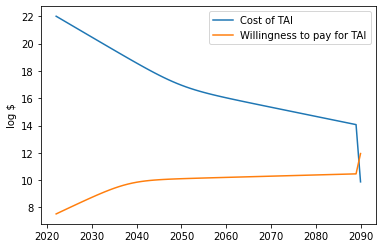

## RUN 25/10000 ##
Diagnostic: tai_flop_size=29.392562727093, nonscaling_delay=4.13355052470636, algo_doubling_rate=4.148992791102511, possible_algo_reduction=2.148172117056724, initial_flops_per_dollar=2.7423974105377056e+17, flops_halving_rate=3.4308543675826773, max_flops_per_dollar=2.964744112799091e+23, initial_pay=17994395.55455892, gdp_growth=1.0292522071683519, max_gdp_frac=0.00043624742699575366, willingness_ramp=0.70169453634409, spend_doubling_time=1.647389546033304
-
It takes 29.4 log FLOPs (~100 octillion) for transformative capabilities.
Every 4.1 years algorithms get 2x better, with 2.1 log reductions possible.
FLOPs start at a cost of 17.4 log FLOPs (~100 quadrillion) per $. Every 3.4 years they get 2x cheaper, to a maximum of 23.5 log FLOPs (~100 sextillion) per $.
We are willing to pay 7.3 log $ (~10 million) and this increases by 1.6x per year to a max of 0.0004% of GDP. GDP grows at a rate of 1.029x per year.
If we are 70.0% of the way to paying for TAI, we will ram

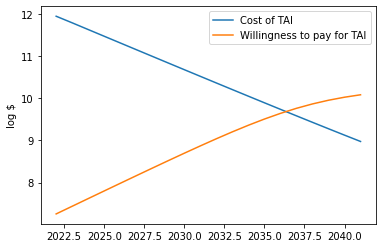

## RUN 26/10000 ##
Diagnostic: tai_flop_size=33.67612273358066, nonscaling_delay=3.9338459475357097, algo_doubling_rate=4.408365578897584, possible_algo_reduction=4.0518925664559085, initial_flops_per_dollar=1.8748254473354106e+17, flops_halving_rate=2.2077978789423187, max_flops_per_dollar=7.513286694194536e+24, initial_pay=15756032.952938981, gdp_growth=1.0261006476160235, max_gdp_frac=0.001149349685581112, willingness_ramp=0.977928463347711, spend_doubling_time=1.380427404660064
-
It takes 33.7 log FLOPs (~one decillion) for transformative capabilities.
Every 4.4 years algorithms get 2x better, with 4.1 log reductions possible.
FLOPs start at a cost of 17.3 log FLOPs (~100 quadrillion) per $. Every 2.2 years they get 2x cheaper, to a maximum of 24.9 log FLOPs (~one septillion) per $.
We are willing to pay 7.2 log $ (~10 million) and this increases by 1.4x per year to a max of 0.0011% of GDP. GDP grows at a rate of 1.026x per year.
If we are 98.0% of the way to paying for TAI, we wil

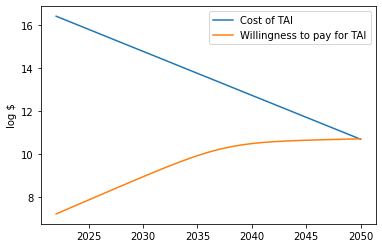

## RUN 27/10000 ##
Diagnostic: tai_flop_size=46.722464692601314, nonscaling_delay=0.5689408360537831, algo_doubling_rate=1.7095913072627231, possible_algo_reduction=6.1253432353556665, initial_flops_per_dollar=2.024774777731428e+17, flops_halving_rate=2.7307824300774475, max_flops_per_dollar=1.4555201601587332e+25, initial_pay=96195216.40078989, gdp_growth=1.0154612317120573, max_gdp_frac=0.0001374032516134638, willingness_ramp=0.8034884762109324, spend_doubling_time=1.864822418195375
-
It takes 46.7 log FLOPs (~10 trillion decillion) for transformative capabilities.
Every 1.7 years algorithms get 2x better, with 6.1 log reductions possible.
FLOPs start at a cost of 17.3 log FLOPs (~100 quadrillion) per $. Every 2.7 years they get 2x cheaper, to a maximum of 25.2 log FLOPs (~10 septillion) per $.
We are willing to pay 8.0 log $ (~10 million) and this increases by 1.9x per year to a max of 0.0001% of GDP. GDP grows at a rate of 1.015x per year.
If we are 80.0% of the way to paying for T

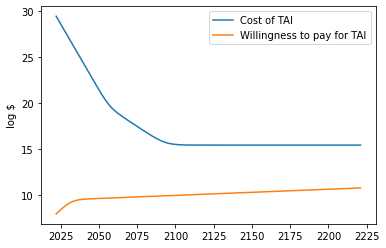

## RUN 28/10000 ##
Diagnostic: tai_flop_size=50.325815611404266, nonscaling_delay=4.545171835926296, algo_doubling_rate=3.1543955229377634, possible_algo_reduction=4.699389350855689, initial_flops_per_dollar=1.3113979825725496e+17, flops_halving_rate=2.9191386622125965, max_flops_per_dollar=3.114279152122893e+24, initial_pay=58748550.88063214, gdp_growth=1.0156162678112475, max_gdp_frac=0.00016983877719830995, willingness_ramp=0.9480002334915429, spend_doubling_time=3.688658139178894
-
It takes 50.3 log FLOPs (~100 quadrillion decillion) for transformative capabilities.
Every 3.2 years algorithms get 2x better, with 4.7 log reductions possible.
FLOPs start at a cost of 17.1 log FLOPs (~100 quadrillion) per $. Every 2.9 years they get 2x cheaper, to a maximum of 24.5 log FLOPs (~one septillion) per $.
We are willing to pay 7.8 log $ (~10 million) and this increases by 3.7x per year to a max of 0.0002% of GDP. GDP grows at a rate of 1.016x per year.
If we are 95.0% of the way to paying f

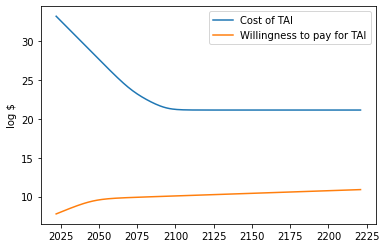

## RUN 29/10000 ##
Diagnostic: tai_flop_size=31.380857293588925, nonscaling_delay=3.286626393999394, algo_doubling_rate=3.644337684360698, possible_algo_reduction=2.088768956230921, initial_flops_per_dollar=1.4780981083653987e+17, flops_halving_rate=2.7928752371569856, max_flops_per_dollar=1.4490351432629786e+24, initial_pay=64706331.22826024, gdp_growth=1.016698927427081, max_gdp_frac=0.0004415671618824378, willingness_ramp=0.9044858215351728, spend_doubling_time=6.7398192565913595
-
It takes 31.4 log FLOPs (~10 nonillion) for transformative capabilities.
Every 3.6 years algorithms get 2x better, with 2.1 log reductions possible.
FLOPs start at a cost of 17.2 log FLOPs (~100 quadrillion) per $. Every 2.8 years they get 2x cheaper, to a maximum of 24.2 log FLOPs (~one septillion) per $.
We are willing to pay 7.8 log $ (~10 million) and this increases by 6.7x per year to a max of 0.0004% of GDP. GDP grows at a rate of 1.017x per year.
If we are 90.0% of the way to paying for TAI, we wil

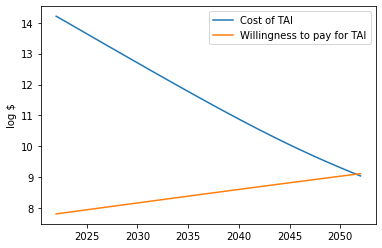

## RUN 30/10000 ##
Diagnostic: tai_flop_size=40.798299557428216, nonscaling_delay=2.8670863941654696, algo_doubling_rate=3.245693757798894, possible_algo_reduction=4.109209668976531, initial_flops_per_dollar=1.8609431066414317e+17, flops_halving_rate=3.0999823801890924, max_flops_per_dollar=2.7436983155483577e+23, initial_pay=24613384.574260898, gdp_growth=1.0377083806658853, max_gdp_frac=0.0006521827240293342, willingness_ramp=0.7314793947620041, spend_doubling_time=0.9119732491884052
-
It takes 40.8 log FLOPs (~10 million decillion) for transformative capabilities.
Every 3.2 years algorithms get 2x better, with 4.1 log reductions possible.
FLOPs start at a cost of 17.3 log FLOPs (~100 quadrillion) per $. Every 3.1 years they get 2x cheaper, to a maximum of 23.4 log FLOPs (~100 sextillion) per $.
We are willing to pay 7.4 log $ (~10 million) and this increases by 0.9x per year to a max of 0.0007% of GDP. GDP grows at a rate of 1.038x per year.
If we are 73.0% of the way to paying for 

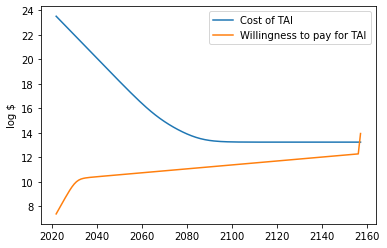

## RUN 101/10000 ##
## RUN 201/10000 ##
## RUN 301/10000 ##
## RUN 401/10000 ##
## RUN 501/10000 ##
## RUN 601/10000 ##
## RUN 701/10000 ##
## RUN 801/10000 ##
## RUN 901/10000 ##
## RUN 1001/10000 ##
## RUN 1101/10000 ##
## RUN 1201/10000 ##
## RUN 1301/10000 ##
## RUN 1401/10000 ##
## RUN 1501/10000 ##
## RUN 1601/10000 ##
## RUN 1701/10000 ##
## RUN 1801/10000 ##
## RUN 1901/10000 ##
## RUN 2001/10000 ##
## RUN 2101/10000 ##
## RUN 2201/10000 ##
## RUN 2301/10000 ##
## RUN 2401/10000 ##
## RUN 2501/10000 ##
## RUN 2601/10000 ##
## RUN 2701/10000 ##
## RUN 2801/10000 ##
## RUN 2901/10000 ##
## RUN 3001/10000 ##
## RUN 3101/10000 ##
## RUN 3201/10000 ##
## RUN 3301/10000 ##
## RUN 3401/10000 ##
## RUN 3501/10000 ##
## RUN 3601/10000 ##
## RUN 3701/10000 ##
## RUN 3801/10000 ##
## RUN 3901/10000 ##
## RUN 4001/10000 ##
## RUN 4101/10000 ##
## RUN 4201/10000 ##
## RUN 4301/10000 ##
## RUN 4401/10000 ##
## RUN 4501/10000 ##
## RUN 4601/10000 ##
## RUN 4701/10000 ##
## RUN 4801/10000 ##
#

In [172]:
tai_years = []
tai_flop_size_log_ = []
plt.ioff()
print('Running')

for r in range(RUNS):
    print_diagnostic = r < 30
    if print_diagnostic or r % 100 == 0 or r >= RUNS - 1:
        print('## RUN {}/{} ##'.format(r + 1, RUNS))
    if print_diagnostic:
        cost_of_tai_collector = []
        willingness_collector = []
    
    tai_flop_size_ = sample(tai_flop_size)
    tai_flop_size_log_.append(tai_flop_size_)
    algo_doubling_rate_ = sample(algo_doubling_rate)
    possible_algo_reduction_ = possible_algo_reduction_fn(sample(min_reduction),
                                                          sample(max_reduction),
                                                          tai_flop_size_)
    initial_flops_per_dollar_ = 10 ** sample(initial_flops_per_dollar)
    flops_halving_rate_ = sample(flops_halving_rate)
    max_flops_per_dollar_ = 10 ** sample(max_flops_per_dollar)
    initial_pay_ = 10 ** sample(initial_pay)
    gdp_growth_ = sample(gdp_growth)
    max_gdp_frac_ = sample(max_gdp_frac)
    willingness_ramp_ = sample(willingness_ramp)
    spend_doubling_time_ = sample(spend_doubling_time)
    nonscaling_delay_ = sample(nonscaling_delay)
    initial_chance_of_nonscaling_issue_ = initial_chance_of_nonscaling_issue
    final_chance_of_nonscaling_issue_ = final_chance_of_nonscaling_issue
    
    if print_diagnostic:
        diagnostic = 'Diagnostic: tai_flop_size={}, nonscaling_delay={}, algo_doubling_rate={}, '
        diagnostic += 'possible_algo_reduction={}, initial_flops_per_dollar={}, flops_halving_rate={}, '
        diagnostic += 'max_flops_per_dollar={}, initial_pay={}, gdp_growth={}, max_gdp_frac={}, '
        diagnostic += 'willingness_ramp={}, spend_doubling_time={}'
        print(diagnostic.format(tai_flop_size_, nonscaling_delay_, algo_doubling_rate_,
                                possible_algo_reduction_, initial_flops_per_dollar_, flops_halving_rate_,
                                max_flops_per_dollar_, initial_pay_, gdp_growth_, max_gdp_frac_,
                                willingness_ramp_, spend_doubling_time_))
        print('-')

        print('It takes {} log FLOPs (~{}) for transformative capabilities.'.format(np.round(tai_flop_size_, 1),
                                                                                    numerize(tai_flop_size_)))
        print('Every {} years algorithms get 2x better, with {} log reductions possible.'.format(np.round(algo_doubling_rate_, 1),
                                                                                                 np.round(possible_algo_reduction_, 1)))
        print(('FLOPs start at a cost of {} log FLOPs (~{}) per $. Every {} years they get ' +
               '2x cheaper, to a maximum of {} log FLOPs (~{}) per $.').format(np.round(math.log10(initial_flops_per_dollar_), 1),
                                                                               numerize(math.log10(initial_flops_per_dollar_)),
                                                                               np.round(flops_halving_rate_, 1),
                                                                               np.round(math.log10(max_flops_per_dollar_), 1),
                                                                               numerize(math.log10(max_flops_per_dollar_))))
        print(('We are willing to pay {} log $ (~{}) and this increases by {}x per year to a max of {}% of GDP. ' +
               'GDP grows at a rate of {}x per year.').format(np.round(math.log10(initial_pay_), 1),
                                                              numerize(math.log10(initial_pay_)),
                                                              np.round(spend_doubling_time_, 1),
                                                              np.round(max_gdp_frac_, 4),
                                                              np.round(gdp_growth_, 3)))
        print('If we are {}% of the way to paying for TAI, we will ramp to paying for TAI.'.format(np.round(willingness_ramp_ * 100)))
        print(('If a non-scaling delay happens, it will take an additional {} years to produce TAI due' +
               ' to issues unrelated to scaling FLOP').format(np.round(nonscaling_delay_, 1)))
        print('---')
    
    tai_created = False
    is_nonscaling_issue = None
    recursive = False
    for y in years:
        if not tai_created:  
            flops_needed_ = flops_needed(initial_flops=10 ** tai_flop_size_,
                                         doubling_rate=algo_doubling_rate_,
                                         possible_reduction=10 ** possible_algo_reduction_,
                                         year=(y - CURRENT_YEAR))
            flops_per_dollar_ = flops_per_dollar(initial_flops_per_dollar=initial_flops_per_dollar_,
                                                 max_flops_per_dollar=max_flops_per_dollar_,
                                                 halving_rate=flops_halving_rate_,
                                                 year=(y - CURRENT_YEAR))
            
            if flops_per_dollar_ > 10 ** 200:
                flops_needed_ = int(flops_needed_)
                flops_per_dollar_ = int(flops_per_dollar_)
                
            cost_of_tai_ = flops_needed_ / flops_per_dollar_
            willingness_ = willingness_to_pay(initial_gdp=initial_gdp,
                                              gdp_growth=gdp_growth_,
                                              initial_pay=initial_pay_,
                                              spend_doubling_time=spend_doubling_time_,
                                              max_gdp_frac=max_gdp_frac_,
                                              year=(y - CURRENT_YEAR))
            
            if flops_per_dollar_ > 10 ** 200:
                willingness_ = int(willingness_)
            if willingness_ > 10 ** 200:
                flops_per_dollar_ = int(flops_per_dollar_)
            
            total_compute_ = willingness_ * flops_per_dollar_
            p_recursive = p_rapid_recursive_self_improvement(flops_needed_,
                                                             total_compute_,
                                                             base_p_recursive,
                                                             recursive_curve_steepness,
                                                             recursive_curve_inflection)
            p_recursive = p_recursive / 8 # Attempt to turn CDF into PDF (approximation)
            
            cost_of_tai_collector.append(cost_of_tai_)
            willingness_collector.append(willingness_)
            
            if print_diagnostic:
                out_str = ('Year: {} - {} max log FLOP ({}) available - TAI takes {} log FLOP ({}) - ' +
                           'log $ {} to buy TAI ({}) vs. willingness to pay log $ {} ({}) - {} log FLOPS per $ ({})')
                print(out_str.format(y,
                                     np.round(math.log10(total_compute_), 1),
                                     numerize(math.log10(total_compute_)),
                                     np.round(math.log10(flops_needed_), 1),
                                     numerize(math.log10(flops_needed_)),
                                     np.round(math.log10(cost_of_tai_), 1),
                                     numerize(math.log10(cost_of_tai_)),
                                     np.round(math.log10(willingness_), 1),
                                     numerize(math.log10(willingness_)),
                                     np.round(math.log10(flops_per_dollar_), 1),
                                     numerize(math.log10(flops_per_dollar_))))
            
            if cost_of_tai_ * willingness_ramp_ <= willingness_:
                if is_nonscaling_issue is None:
                    p_nonscaling_delay_ = p_nonscaling_delay(initial_chance_of_nonscaling_issue,
                                                             final_chance_of_nonscaling_issue,
                                                             year=y,
                                                             max_year=nonscaling_issue_bottom_year)
                    r_ = random.random()
                    is_nonscaling_issue = r_ < p_nonscaling_delay_
                    nonscaling_countdown = nonscaling_delay_
                    if print_diagnostic:
                        print('-- {} p_nonscaling_issue={} r_={}'.format('Nonscaling delay occured' if is_nonscaling_issue else 'Nonscaling issue did not occur',
                                                                         np.round(p_nonscaling_delay_, 4),
                                                                         np.round(r_, 4)))
                
                if not is_nonscaling_issue or nonscaling_countdown <= 0.1:
                    if print_diagnostic:
                        print('--- /!\ TAI CREATED in {}'.format(y))
                        plot_tai(plt, years, cost_of_tai_collector, willingness_collector).show()
                    tai_years.append(y)
                    tai_created = True
                else:
                    if print_diagnostic:
                        print('/!\ FLOPs for TAI sufficient but needs {} more years to solve non-scaling issues'.format(np.round(nonscaling_countdown, 1)))
                    nonscaling_countdown -= 1
            
            r_ = random.random()
            if not tai_created and not is_nonscaling_issue and not recursive and r_ < p_recursive:
                flops_halving_rate__ = sample(recursive_flops_halving_rate)
                flops_halving_rate_ = flops_halving_rate__ if flops_halving_rate__ < flops_halving_rate_ else flops_halving_rate_
                algo_doubling_rate__ = sample(recursive_algo_doubling_rate)
                algo_doubling_rate_ = algo_doubling_rate__ if algo_doubling_rate__ < algo_doubling_rate_ else algo_doubling_rate_
                spend_doubling_time__ = sample(recursive_spend_doubling_time)
                spend_doubling_time_ = spend_doubling_time__ if spend_doubling_time__ < spend_doubling_time_ else spend_doubling_time_
                gdp_growth__ = sample(recursive_gdp_growth)
                gdp_growth_ = gdp_growth__ if gdp_growth__ > gdp_growth_ else gdp_growth_
                initial_chance_of_nonscaling_issue_ = recursive_initial_chance_of_nonscaling_issue
                final_chance_of_nonscaling_issue_ = recursive_final_chance_of_nonscaling_issue
                recursive = True
                # TODO: fix issue where this changes the variables as of 2022 rather than as of the time of the rapid recursion

                if print_diagnostic:
                    print(('--- rapid recursive loop (ratio={} p={}, r_={}) - set flops_having_rate={}, ' +
                           'algo_doubling_rate={} spend_doubling_time={}, gdp_growth={}, initial_chance_of_nonscaling_issue={} ' +
                           'final_chance_of_nonscaling_issue={}').format(total_compute_ / flops_needed_,
                                                                         p_recursive,
                                                                         r_,
                                                                         flops_halving_rate_,
                                                                         algo_doubling_rate_,
                                                                         spend_doubling_time_,
                                                                         gdp_growth_,
                                                                         initial_chance_of_nonscaling_issue,
                                                                         final_chance_of_nonscaling_issue))
                if event_occurs(p_recursive_creates_tai_instantly):
                    if print_diagnostic:
                        print('--- /!\ RRSI LOOP CREATES TAI in {}'.format(y))
                        plot_tai(plt, years, cost_of_tai_collector, willingness_collector).show()
                    tai_years.append(y)
                    tai_created = True
                        
            elif not tai_created and not is_nonscaling_issue and not recursive and print_diagnostic:
                print('--- no rapid recursive loop (ratio={}, p={}, r_={})'.format(round(total_compute_ / flops_needed_, 3),
                                                                                   p_recursive,
                                                                                   r_))
                
    if not tai_created:
        if print_diagnostic:
            print('--- :/ TAI NOT CREATED BEFORE {}'.format(MAX_YEAR + 1))
            plot_tai(plt, years, cost_of_tai_collector, willingness_collector).show()
        tai_years.append(MAX_YEAR + 1)


In [173]:
out = get_percentiles(tai_years)
[str(o[0]) + '%: ' + (str(int(o[1])) if o[1] < MAX_YEAR else '>' + str(MAX_YEAR)) for o in out.items()]

# NOTE: Ajeya's numbers should output something very close to:
# '5%': 2027,
# '10%: 2031',
# '20%: 2037',
# '30%: 2042',
# '40%: 2047',
# '50%: 2053',
# '60%: 2061',
# '70%: 2073',
# '80%: >2100',
# '90%: >2100',
# '95%: >2100'

# My latest numbers (2022 Jul 28 6:35PM CT):
#['5%: 2029',
# '10%: 2033',
# '20%: 2040',
# '30%: 2048',
# '40%: 2056',
# '50%: 2065',
# '60%: 2076',
# '70%: 2092',
# '80%: 2138',
# '90%: >2222',
# '95%: >2222']


['5%: 2029',
 '10%: 2033',
 '20%: 2040',
 '30%: 2048',
 '40%: 2056',
 '50%: 2065',
 '60%: 2076',
 '70%: 2092',
 '80%: 2138',
 '90%: >2222',
 '95%: >2222']

In [174]:
[str(o[0]) + '%: ' + (str(int(o[1]) - CURRENT_YEAR) if o[1] < MAX_YEAR else '>' + str(MAX_YEAR - CURRENT_YEAR)) + ' years from now' for o in out.items()]


['5%: 7 years from now',
 '10%: 11 years from now',
 '20%: 18 years from now',
 '30%: 26 years from now',
 '40%: 34 years from now',
 '50%: 43 years from now',
 '60%: 54 years from now',
 '70%: 70 years from now',
 '80%: 116 years from now',
 '90%: >200 years from now',
 '95%: >200 years from now']

In [175]:
def print_chance_tai_by_year(data, year_target):
    return '{}% chance of TAI by EOY {}'.format(int(np.round(sum([1 if y <= year_target else 0 for y in data]) / len(data) * 100, 0)),
                                                year_target)
    
print('## Within <2 years')
print_chance_tai_by_year(tai_years, 2023)


## Within <2 years


'0% chance of TAI by EOY 2023'

In [176]:
print_chance_tai_by_year(tai_years, 2024)

'1% chance of TAI by EOY 2024'

In [177]:
print_chance_tai_by_year(tai_years, 2025)

'2% chance of TAI by EOY 2025'

In [178]:
print('## Within 5 years')
print_chance_tai_by_year(tai_years, 2027)

## Within 5 years


'3% chance of TAI by EOY 2027'

In [179]:
print_chance_tai_by_year(tai_years, 2029)

'6% chance of TAI by EOY 2029'

In [180]:
print_chance_tai_by_year(tai_years, 2030)

'7% chance of TAI by EOY 2030'

In [181]:
print('## Within 10 years')
print_chance_tai_by_year(tai_years, 2032)

## Within 10 years


'9% chance of TAI by EOY 2032'

In [182]:
# Holden benchmarks from https://www.cold-takes.com/biological-anchors-is-about-bounding-not-pinpointing-ai-timelines/#bio-anchors-as-a-way-of-bounding-ai-timelines
print('## Within 14 years (Holden benchmark - 10%-50%, Holden: 10%)')
print_chance_tai_by_year(tai_years, 2036)


## Within 14 years (Holden benchmark - 10%-50%, Holden: 10%)


'15% chance of TAI by EOY 2036'

In [183]:
print('## Within 15 years')
print_chance_tai_by_year(tai_years, 2037)

## Within 15 years


'16% chance of TAI by EOY 2037'

In [184]:
print_chance_tai_by_year(tai_years, 2040)

'20% chance of TAI by EOY 2040'

In [185]:
print('## Within 20 years')
print_chance_tai_by_year(tai_years, 2042)

## Within 20 years


'23% chance of TAI by EOY 2042'

In [186]:
print('## Within 25 years')
print_chance_tai_by_year(tai_years, 2047)

## Within 25 years


'30% chance of TAI by EOY 2047'

In [187]:
print_chance_tai_by_year(tai_years, 2050)

'33% chance of TAI by EOY 2050'

In [188]:
print_chance_tai_by_year(tai_years, 2060)

'46% chance of TAI by EOY 2060'

In [189]:
print('## Within 38 years (Holden benchmark - 25%-75%, Holden: 50%)')
print_chance_tai_by_year(tai_years, 2060)

## Within 38 years (Holden benchmark - 25%-75%, Holden: 50%)


'46% chance of TAI by EOY 2060'

In [190]:
print('## Within 48 years (Carlsmith benchmark - Carlsmith: 50%)')
print_chance_tai_by_year(tai_years, 2070)

## Within 48 years (Carlsmith benchmark - Carlsmith: 50%)


'56% chance of TAI by EOY 2070'

In [191]:
print('## Within 50 years')
print_chance_tai_by_year(tai_years, 2072)

## Within 50 years


'58% chance of TAI by EOY 2072'

In [192]:
print('## Within my personal expected lifespan')
print_chance_tai_by_year(tai_years, 2078)

## Within my personal expected lifespan


'62% chance of TAI by EOY 2078'

In [193]:
print('## Within 75 years')
print_chance_tai_by_year(tai_years, 2097)

## Within 75 years


'72% chance of TAI by EOY 2097'

In [194]:
print('## Within 78 years (Holden benchmark - 33%-90%, Holden: 66%)')
print_chance_tai_by_year(tai_years, 2100)

## Within 78 years (Holden benchmark - 33%-90%, Holden: 66%)


'73% chance of TAI by EOY 2100'

In [195]:
print('## Within 100 years')
print_chance_tai_by_year(tai_years, 2122)

## Within 100 years


'78% chance of TAI by EOY 2122'

In [196]:
print('## Within 200 years')
print_chance_tai_by_year(tai_years, 2222)

## Within 200 years


'86% chance of TAI by EOY 2222'

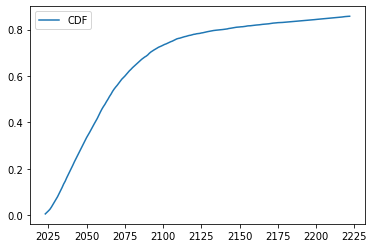

In [197]:
tai_years_ = np.array([MAX_YEAR + 1 if t > MAX_YEAR else t for t in tai_years])
count, bins_count = np.histogram(tai_years_, bins=(MAX_YEAR - CURRENT_YEAR))
pdf = count / sum(count)
cdf = np.cumsum(pdf)
bins = np.round(np.array([b for b in bins_count[1:] if b <= MAX_YEAR]))

plt.plot(bins, cdf[:len(bins)], label='CDF')
plt.legend()

<string>:192: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
<string>:193: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#d

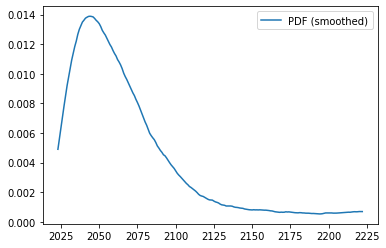

In [198]:
pdf_smoothed = savitzky_golay(pdf[:len(bins)], 51, 3) # window size 51, polynomial order 3
plt.plot(bins, pdf_smoothed, label='PDF (smoothed)')
plt.legend()
plt.show()

In [199]:
cdf[:len(bins)]

array([0.0049, 0.011 , 0.0177, 0.0246, 0.0344, 0.0453, 0.0561, 0.0668,
       0.0789, 0.0921, 0.1051, 0.1189, 0.1338, 0.1458, 0.1608, 0.1741,
       0.1874, 0.2006, 0.2149, 0.2293, 0.2424, 0.2553, 0.2686, 0.2823,
       0.2958, 0.3078, 0.3214, 0.3342, 0.3453, 0.3569, 0.3693, 0.3807,
       0.3934, 0.4049, 0.4168, 0.4309, 0.4441, 0.4568, 0.4678, 0.4776,
       0.4893, 0.4998, 0.5116, 0.5217, 0.5335, 0.5433, 0.5518, 0.5595,
       0.5681, 0.5773, 0.5858, 0.5924, 0.5991, 0.6069, 0.6151, 0.6221,
       0.6283, 0.6354, 0.6415, 0.6479, 0.6531, 0.6598, 0.6659, 0.6716,
       0.6766, 0.6815, 0.6854, 0.6906, 0.6975, 0.7031, 0.7076, 0.7117,
       0.7154, 0.7195, 0.7236, 0.7262, 0.7293, 0.7326, 0.7359, 0.7382,
       0.7414, 0.7448, 0.7475, 0.7499, 0.7533, 0.7569, 0.7598, 0.7617,
       0.763 , 0.7651, 0.7675, 0.7692, 0.7706, 0.7725, 0.7745, 0.7755,
       0.7775, 0.7793, 0.7802, 0.7819, 0.7835, 0.7852, 0.7862, 0.7878,
       0.7892, 0.7908, 0.7921, 0.7931, 0.7944, 0.7958, 0.7967, 0.7974,
      

In [200]:
pdf[:len(bins)]

array([0.0049, 0.0061, 0.0067, 0.0069, 0.0098, 0.0109, 0.0108, 0.0107,
       0.0121, 0.0132, 0.013 , 0.0138, 0.0149, 0.012 , 0.015 , 0.0133,
       0.0133, 0.0132, 0.0143, 0.0144, 0.0131, 0.0129, 0.0133, 0.0137,
       0.0135, 0.012 , 0.0136, 0.0128, 0.0111, 0.0116, 0.0124, 0.0114,
       0.0127, 0.0115, 0.0119, 0.0141, 0.0132, 0.0127, 0.011 , 0.0098,
       0.0117, 0.0105, 0.0118, 0.0101, 0.0118, 0.0098, 0.0085, 0.0077,
       0.0086, 0.0092, 0.0085, 0.0066, 0.0067, 0.0078, 0.0082, 0.007 ,
       0.0062, 0.0071, 0.0061, 0.0064, 0.0052, 0.0067, 0.0061, 0.0057,
       0.005 , 0.0049, 0.0039, 0.0052, 0.0069, 0.0056, 0.0045, 0.0041,
       0.0037, 0.0041, 0.0041, 0.0026, 0.0031, 0.0033, 0.0033, 0.0023,
       0.0032, 0.0034, 0.0027, 0.0024, 0.0034, 0.0036, 0.0029, 0.0019,
       0.0013, 0.0021, 0.0024, 0.0017, 0.0014, 0.0019, 0.002 , 0.001 ,
       0.002 , 0.0018, 0.0009, 0.0017, 0.0016, 0.0017, 0.001 , 0.0016,
       0.0014, 0.0016, 0.0013, 0.001 , 0.0013, 0.0014, 0.0009, 0.0007,
      

<string>:192: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
<string>:193: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#d

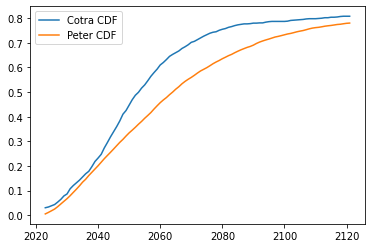

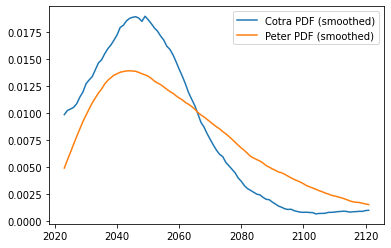

In [202]:
ajeya_cdf = [0.03 , 0.033, 0.038, 0.043, 0.053, 0.064, 0.078, 0.086, 0.107, 0.12 , 0.131, 0.142, 0.155, 0.168, 0.178,
             0.197, 0.218, 0.232, 0.247, 0.273, 0.295, 0.318, 0.339, 0.36 , 0.383, 0.41 , 0.425, 0.447, 0.469, 0.487,
             0.499, 0.516, 0.529, 0.546, 0.564, 0.579, 0.593, 0.61 , 0.62 , 0.632, 0.645, 0.653, 0.66 , 0.667, 0.677,
             0.684, 0.692, 0.702, 0.706, 0.713, 0.72 , 0.727, 0.733, 0.739, 0.743, 0.745, 0.751, 0.755, 0.758, 0.763,
             0.766, 0.77 , 0.773, 0.775, 0.777, 0.777, 0.778, 0.78 , 0.78 , 0.781, 0.781, 0.784, 0.786, 0.787, 0.787,
             0.787, 0.787, 0.787, 0.788, 0.791, 0.792, 0.793, 0.794, 0.795, 0.797, 0.798, 0.798, 0.798, 0.799, 0.8  ,
             0.802, 0.802, 0.804, 0.804, 0.805, 0.807, 0.808, 0.808, 0.808]
ajeya_pdf = np.append(np.array(ajeya_cdf[0]), np.diff(ajeya_cdf[:len(bins)]))
ajeya_pdf_smoothed = savitzky_golay(ajeya_pdf[:len(bins)], 51, 3)

peter_cdf = [0.0049, 0.011 , 0.0177, 0.0246, 0.0344, 0.0453, 0.0561, 0.0668,
       0.0789, 0.0921, 0.1051, 0.1189, 0.1338, 0.1458, 0.1608, 0.1741,
       0.1874, 0.2006, 0.2149, 0.2293, 0.2424, 0.2553, 0.2686, 0.2823,
       0.2958, 0.3078, 0.3214, 0.3342, 0.3453, 0.3569, 0.3693, 0.3807,
       0.3934, 0.4049, 0.4168, 0.4309, 0.4441, 0.4568, 0.4678, 0.4776,
       0.4893, 0.4998, 0.5116, 0.5217, 0.5335, 0.5433, 0.5518, 0.5595,
       0.5681, 0.5773, 0.5858, 0.5924, 0.5991, 0.6069, 0.6151, 0.6221,
       0.6283, 0.6354, 0.6415, 0.6479, 0.6531, 0.6598, 0.6659, 0.6716,
       0.6766, 0.6815, 0.6854, 0.6906, 0.6975, 0.7031, 0.7076, 0.7117,
       0.7154, 0.7195, 0.7236, 0.7262, 0.7293, 0.7326, 0.7359, 0.7382,
       0.7414, 0.7448, 0.7475, 0.7499, 0.7533, 0.7569, 0.7598, 0.7617,
       0.763 , 0.7651, 0.7675, 0.7692, 0.7706, 0.7725, 0.7745, 0.7755,
       0.7775, 0.7793, 0.7802, 0.7819, 0.7835, 0.7852, 0.7862, 0.7878,
       0.7892, 0.7908, 0.7921, 0.7931, 0.7944, 0.7958, 0.7967, 0.7974,
       0.798 , 0.7989, 0.7995, 0.8001, 0.8012, 0.8019, 0.8028, 0.8046,
       0.8054, 0.8067, 0.8082, 0.8089, 0.81  , 0.8104, 0.8111, 0.8119,
       0.8122, 0.813 , 0.814 , 0.8154, 0.8161, 0.8163, 0.8172, 0.8177,
       0.8186, 0.8195, 0.8199, 0.8206, 0.8216, 0.8224, 0.8229, 0.8234,
       0.8241, 0.8248, 0.8256, 0.8268, 0.8278, 0.8282, 0.8289, 0.8297,
       0.8299, 0.8302, 0.8306, 0.8312, 0.8316, 0.8324, 0.833 , 0.8336,
       0.8343, 0.8349, 0.8355, 0.8361, 0.8365, 0.8374, 0.8381, 0.8388,
       0.8393, 0.8398, 0.8405, 0.841 , 0.8416, 0.8417, 0.8424, 0.8428,
       0.8433, 0.8442, 0.8448, 0.8452, 0.8457, 0.8464, 0.847 , 0.8476,
       0.848 , 0.8486, 0.8492, 0.8498, 0.8505, 0.851 , 0.8518, 0.8525,
       0.8535, 0.8541, 0.8551, 0.8559, 0.8566, 0.857 , 0.8574]
peter_pdf = np.append(np.array(peter_cdf[0]), np.diff(peter_cdf[:len(bins)]))
peter_pdf_smoothed = savitzky_golay(peter_pdf[:len(bins)], 51, 3)

plt.plot(bins[:99], ajeya_cdf[:99], label='Cotra CDF')
plt.plot(bins[:99], peter_cdf[:99], label='Peter CDF')
plt.legend()
plt.show()

plt.plot(bins[:99], ajeya_pdf_smoothed[:99], label='Cotra PDF (smoothed)')
plt.plot(bins[:99], peter_pdf_smoothed[:99], label='Peter PDF (smoothed)')
plt.legend()
plt.show()